# Military Power Clustering

Source : globalfirepower.com on 1st may 2020

In [390]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

# User Defined Function

In [392]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [393]:
# To view summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

# Ingest Data  

In [394]:
# df0 = pd.read_csv("../input/world-military-power-2020/World military power.csv", header=1)
# df = df0.copy()

In [395]:
df0 = pd.read_csv("World military power.csv", header=1)
df = df0.copy()

In [396]:
df0.head(1)

Military Strength  Military Strength Power Index Aircraft Strength  \
0       Afghanistan                          1.344       Afghanistan   

  Aircraft Strength value Fighter/Interceptor Strength  \
0                     260                  Afghanistan   

  Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                  0              Afghanistan   

   Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                          25.000                       Afghanistan   

   Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
0                                   30.000            Afghanistan   

  Trainer Aircraft Fleet value Helicopter Fleet Strength  \
0                            0               Afghanistan   

  Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
0                             187                      Afghanistan   

   Attack Helicopter Fleet Strength value Tank Strength Tank Strength value  \
0                                   0.000   Afghanistan                   0   

  AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength  \
0      Afghanistan                  1,062                       Afghanistan   

  Self-Propelled Artillery Strength value Towed Artillery Strength  \
0                                       0              Afghanistan   

  Towed Artillery Strength value Rocket Projector Strength  \
0                            176               Afghanistan   

  Rocket Projector Strength value Navy Fleet Strengths  \
0                              50          Afghanistan   

   Navy Fleet Strengths value Aircraft Carrier Fleet Strength  \
0                       0.000                     Afghanistan   

   Aircraft Carrier Fleet Strength value Submarine Fleet Strength  \
0                                  0.000              Afghanistan   

   Submarine Fleet Strength value Destroyer Fleet Strength  \
0                           0.000              Afghanistan   

   Destroyer Fleet Strength value Frigate Fleet Strength  \
0                           0.000            Afghanistan   

   Frigate Fleet Strength value defense spending budget  \
0                         0.000             Afghanistan   

  defense spending budget value External Debt External Debt value  \
0               12,00,00,00,000   Afghanistan      2,84,00,00,000   

  Airport Totals Airport Totals value Oil Production Oil Production value  \
0    Afghanistan                   43    Afghanistan                    0   

  Oil Consumption Oil Consumption value Proven Oil Reserves  \
0     Afghanistan                 5,500         Afghanistan   

  Proven Oil Reserves value Available Manpower Available Manpower value  \
0                         0        Afghanistan              1,43,25,743   

  Total Population Total Population value Total Square Land Area  \
0      Afghanistan            3,49,40,837            Afghanistan   

  Total Square Land Area value Total Coastline Coverage  \
0                     6,52,230              Afghanistan   

  Total Coastline Coverage value Total Waterway Coverage  \
0                              0             Afghanistan   

  Total Waterway Coverage value Total Border Coverage  \
0                         1,200           Afghanistan   

  Total Border Coverage value  
0                       5,987

# EDA

## Implement basic steps to see how is your data looks like

In [397]:
df.head(3)

Military Strength  Military Strength Power Index Aircraft Strength  \
0       Afghanistan                          1.344       Afghanistan   
1           Albania                          2.314           Albania   
2           Algeria                          0.466           Algeria   

  Aircraft Strength value Fighter/Interceptor Strength  \
0                     260                  Afghanistan   
1                      19                      Albania   
2                     551                      Algeria   

  Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                  0              Afghanistan   
1                                  0                  Albania   
2                                103                  Algeria   

   Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                          25.000                       Afghanistan   
1                           0.000                           Albania   
2                          22.000                           Algeria   

   Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
0                                   30.000            Afghanistan   
1                                    0.000                Albania   
2                                   59.000                Algeria   

  Trainer Aircraft Fleet value Helicopter Fleet Strength  \
0                            0               Afghanistan   
1                            0                   Albania   
2                           87                   Algeria   

  Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
0                             187                      Afghanistan   
1                              19                          Albania   
2                             257                          Algeria   

   Attack Helicopter Fleet Strength value Tank Strength Tank Strength value  \
0                                   0.000   Afghanistan                   0   
1                                   0.000       Albania                   0   
2                                  45.000       Algeria                 880   

  AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength  \
0      Afghanistan                  1,062                       Afghanistan   
1          Albania                    467                           Albania   
2          Algeria                  7,361                           Algeria   

  Self-Propelled Artillery Strength value Towed Artillery Strength  \
0                                       0              Afghanistan   
1                                       0                  Albania   
2                                     320                  Algeria   

  Towed Artillery Strength value Rocket Projector Strength  \
0                            176               Afghanistan   
1                              0                   Albania   
2                            240                   Algeria   

  Rocket Projector Strength value Navy Fleet Strengths  \
0                              50          Afghanistan   
1                               0              Albania   
2                             316              Algeria   

   Navy Fleet Strengths value Aircraft Carrier Fleet Strength  \
0                       0.000                     Afghanistan   
1                      38.000                         Albania   
2                     201.000                         Algeria   

   Aircraft Carrier Fleet Strength value Submarine Fleet Strength  \
0                                  0.000              Afghanistan   
1                                  0.000                  Albania   
2                                  0.000                  Algeria   

   Submarine Fleet Strength value Destroyer Fleet Strength  \
0                           0.000              Afghanistan   
1                           0.000                  Albania   
2             

In [398]:
df.tail(3)

Military Strength  Military Strength Power Index Aircraft Strength  \
162               NaN                            NaN               NaN   
163               NaN                            NaN               NaN   
164               NaN                            NaN               NaN   

    Aircraft Strength value Fighter/Interceptor Strength  \
162                     NaN                          NaN   
163                     NaN                          NaN   
164                     NaN                          NaN   

    Fighter/Interceptor Strength value Attack Aircraft Strength  \
162                                NaN                      NaN   
163                                NaN                      NaN   
164                                NaN                      NaN   

     Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
162                             NaN                               NaN   
163                             NaN                               NaN   
164                             NaN                               NaN   

     Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
162                                      NaN                    NaN   
163                                      NaN                    NaN   
164                                      NaN                    NaN   

    Trainer Aircraft Fleet value Helicopter Fleet Strength  \
162                          NaN                       NaN   
163                          NaN                       NaN   
164                          NaN                       NaN   

    Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
162                             NaN                              NaN   
163                             NaN                              NaN   
164                             NaN                              NaN   

     Attack Helicopter Fleet Strength value Tank Strength Tank Strength value  \
162                                     NaN           NaN                 NaN   
163                                     NaN           NaN                 NaN   
164                                     NaN           NaN                 NaN   

    AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength  \
162              NaN                    NaN                               NaN   
163              NaN                    NaN                               NaN   
164              NaN                    NaN                               NaN   

    Self-Propelled Artillery Strength value Towed Artillery Strength  \
162                                     NaN                      NaN   
163                                     NaN                      NaN   
164                                     NaN                      NaN   

    Towed Artillery Strength value Rocket Projector Strength  \
162                            NaN                       NaN   
163                            NaN                       NaN   
164                            NaN                       NaN   

    Rocket Projector Strength value Navy Fleet Strengths  \
162                             NaN                  NaN   
163                             NaN                  NaN   
164                             NaN                  NaN   

     Navy Fleet Strengths value Aircraft Carrier Fleet Strength  \
162                         NaN                             NaN   
163                         NaN                             NaN   
164                         NaN                             NaN   

     Aircraft Carrier Fleet Strength value Submarine Fleet Strength  \
162                                    NaN                      NaN   
163                                    NaN                      NaN   
164                                    NaN                      NaN   

     Submarine Fleet Strength value Destroyer Fleet Strength  \
162                       

In [399]:
df.sample(10)

Military Strength  Military Strength Power Index Aircraft Strength  \
123           Tunisia                          1.462           Tunisia   
164               NaN                            NaN               NaN   
140               NaN                            NaN               NaN   
142               NaN                            NaN               NaN   
110       South Korea                          0.151       South Korea   
28            Croatia                          1.018           Croatia   
26              China                          0.069             China   
0         Afghanistan                          1.344       Afghanistan   
102      Saudi Arabia                          0.303      Saudi Arabia   
91           Pakistan                          0.236          Pakistan   

    Aircraft Strength value Fighter/Interceptor Strength  \
123                     147                      Tunisia   
164                     NaN                          NaN   
140                     NaN                          NaN   
142                     NaN                          NaN   
110                   1,649                  South Korea   
28                       78                      Croatia   
26                    3,210                        China   
0                       260                  Afghanistan   
102                     879                 Saudi Arabia   
91                    1,372                     Pakistan   

    Fighter/Interceptor Strength value Attack Aircraft Strength  \
123                                 12                  Tunisia   
164                                NaN                      NaN   
140                                NaN                      NaN   
142                                NaN                      NaN   
110                                414              South Korea   
28                                  12                  Croatia   
26                               1,232                    China   
0                                    0              Afghanistan   
102                                270             Saudi Arabia   
91                                 356                 Pakistan   

     Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
123                           0.000                           Tunisia   
164                             NaN                               NaN   
140                             NaN                               NaN   
142                             NaN                               NaN   
110                          71.000                       South Korea   
28                            0.000                           Croatia   
26                          371.000                             China   
0                            25.000                       Afghanistan   
102                          81.000                      Saudi Arabia   
91                           90.000                          Pakistan   

     Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
123                                   14.000                Tunisia   
164                                      NaN                    NaN   
140                                      NaN                    NaN   
142                                      NaN                    NaN   
110                                   41.000            South Korea   
28                                     0.000                Croatia   
26                                   224.000                  China   
0                                     30.000            Afghanistan   
102                                   49.000           Saudi Arabia   
91                                    49.000               Pakistan   

    Trainer Aircraft Fleet value Helicopter Fleet Strength  \
123                           29                   Tunisia   
164                          NaN                       NaN   
140               

In [400]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [401]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [402]:
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter/interceptor_strength', 'fighter/interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [403]:
df.shape

(165, 60)

In [404]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 165 observation and 60 columns in the dataset


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength                        138 non-null    object 
 1   military_strength_power_index            138 non-null    float64
 2   aircraft_strength                        138 non-null    object 
 3   aircraft_strength_value                  138 non-null    object 
 4   fighter/interceptor_strength             138 non-null    object 
 5   fighter/interceptor_strength_value       138 non-null    object 
 6   attack_aircraft_strength                 138 non-null    object 
 7   attack_aircraft_strength_value           138 non-null    float64
 8   transport_aircraft_fleet_strength        138 non-null    object 
 9   transport_aircraft_fleet_strength_value  138 non-null    float64
 10  trainer_aircraft_fleet                   138 non-n

In [406]:
df.describe().T

count   mean     std   min    25%  \
military_strength_power_index           138.000  1.461   1.324 0.061  0.575   
attack_aircraft_strength_value          138.000 25.761  94.528 0.000  0.000   
transport_aircraft_fleet_strength_value 138.000 30.232  92.330 0.000  3.000   
attack_helicopter_fleet_strength_value  138.000 25.623  97.326 0.000  0.000   
navy_fleet_strengths_value              124.000 84.984 146.114 0.000 10.000   
aircraft_carrier_fleet_strength_value   115.000  0.383   1.972 0.000  0.000   
submarine_fleet_strength_value          115.000  4.800  13.707 0.000  0.000   
destroyer_fleet_strength_value          115.000  2.052  10.001 0.000  0.000   
frigate_fleet_strength_value            115.000  3.522   6.481 0.000  0.000   

                                           50%    75%     max  
military_strength_power_index            1.034  2.022  10.168  
attack_aircraft_strength_value           0.000 15.750 742.000  
transport_aircraft_fleet_strength_value  9.000 26.000 945.000  
attack_helicopter_fleet_strength_value   2.000 17.750 967.000  
navy_fleet_strengths_value              38.000 77.750 984.000  
aircraft_carrier_fleet_strength_value    0.000  0.000  20.000  
submarine_fleet_strength_value           0.000  4.000  83.000  
destroyer_fleet_strength_value           0.000  0.000  91.000  
frigate_fleet_strength_value             0.000  5.500  52.000

In [407]:
df.describe(include=object).T

count unique             top freq
military_strength                         138    138     Afghanistan    1
aircraft_strength                         138    138     Afghanistan    1
aircraft_strength_value                   138    113              19    5
fighter/interceptor_strength              138    138     Afghanistan    1
fighter/interceptor_strength_value        138     63               0   46
attack_aircraft_strength                  138    138     Afghanistan    1
transport_aircraft_fleet_strength         138    138     Afghanistan    1
trainer_aircraft_fleet                    138    138     Afghanistan    1
trainer_aircraft_fleet_value              138     77               0   25
helicopter_fleet_strength                 138    138     Afghanistan    1
helicopter_fleet_strength_value           138     97               5    4
attack_helicopter_fleet_strength          138    138     Afghanistan    1
tank_strength                             138    138     Afghanistan    1
tank_strength_value                       138    106               0   24
afv/apc_strength                          138    138     Afghanistan    1
afv/apc_strength_value                    138    130           2,000    4
self-propelled_artillery_strength         138    138     Afghanistan    1
self-propelled_artillery_strength_value   138     70               0   52
towed_artillery_strength                  138    138     Afghanistan    1
towed_artillery_strength_value            138     91               0   24
rocket_projector_strength                 138    138     Afghanistan    1
rocket_projector_strength_value           138     68               0   46
navy_fleet_strengths                      124    124     Afghanistan    1
aircraft_carrier_fleet_strength           115    115     Afghanistan    1
submarine_fleet_strength                  115    115     Afghanistan    1
destroyer_fleet_strength                  115    115     Afghanistan    1
frigate_fleet_strength                    115    115     Afghanistan    1
defense_spending_budget                   138    138     Afghanistan    1
defense_spending_budget_value             138    124  2,50,00,00,000    3
external_debt                             138    138     Afghanistan    1
external_debt_value                       138    138  2,84,00,00,000    1
airport_totals                            138    138     Afghanistan    1
airport_totals_value                      138    108              18    3
oil_production                            138    138     Afghanistan    1
oil_production_value                      138     88               0   46
oil_consumption                           138    138     Afghanistan    1
oil_consumption_value                     138    102          18,500    4
proven_oil_reserves                       138    138     Afghanistan    1
proven_oil_reserves_value                 138     84               0   46
available_manpower                        138    138     Afghanistan    1
available_manpower_value                  138    138     1,43,25,743    1
total_population                          138    138     Afghanistan    1
total_population_value                    138    138     3,49,40,837    1
total_square_land_area                    138    138     Afghanistan    1
total_square_land_area_value              138    138        6,52,230    1
total_coastline_coverage                  109    109     Afghanistan    1
total_coastline_coverage_value            109    104             853    2
total_waterway_coverage                   138    138     Afghanistan    1
total_waterway_coverage_value             138     92               0   38
total_border_coverage                     129    129     Afghanistan    1
total_border_coverage_value               129    125             443    2

In [408]:
df.nunique()

military_strength                          138
military_strength_power_index              138
aircraft_strength                          138
aircraft_strength_value                    113
fighter/interceptor_strength               138
fighter/interceptor_strength_value          63
attack_aircraft_strength                   138
attack_aircraft_strength_value              38
transport_aircraft_fleet_strength          138
transport_aircraft_fleet_strength_value     49
trainer_aircraft_fleet                     138
trainer_aircraft_fleet_value                77
helicopter_fleet_strength                  138
helicopter_fleet_strength_value             97
attack_helicopter_fleet_strength           138
attack_helicopter_fleet_strength_value      45
tank_strength                              138
tank_strength_value                        106
afv/apc_strength                           138
afv/apc_strength_value                     130
self-propelled_artillery_strength          138
self-propelle

In [409]:
# to find how many unique values object features have
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

military_strength_power_index has 138 unique value
attack_aircraft_strength_value has 38 unique value
transport_aircraft_fleet_strength_value has 49 unique value
attack_helicopter_fleet_strength_value has 45 unique value
navy_fleet_strengths_value has 78 unique value
aircraft_carrier_fleet_strength_value has 5 unique value
submarine_fleet_strength_value has 20 unique value
destroyer_fleet_strength_value has 11 unique value
frigate_fleet_strength_value has 18 unique value


In [410]:
df.duplicated().value_counts()

False    139
True      26
dtype: int64

In [411]:
duplicate = df[df.duplicated()]

In [412]:
duplicate

military_strength  military_strength_power_index aircraft_strength  \
139               NaN                            NaN               NaN   
140               NaN                            NaN               NaN   
141               NaN                            NaN               NaN   
142               NaN                            NaN               NaN   
143               NaN                            NaN               NaN   
144               NaN                            NaN               NaN   
145               NaN                            NaN               NaN   
146               NaN                            NaN               NaN   
147               NaN                            NaN               NaN   
148               NaN                            NaN               NaN   
149               NaN                            NaN               NaN   
150               NaN                            NaN               NaN   
151               NaN                            NaN               NaN   
152               NaN                            NaN               NaN   
153               NaN                            NaN               NaN   
154               NaN                            NaN               NaN   
155               NaN                            NaN               NaN   
156               NaN                            NaN               NaN   
157               NaN                            NaN               NaN   
158               NaN                            NaN               NaN   
159               NaN                            NaN               NaN   
160               NaN                            NaN               NaN   
161               NaN                            NaN               NaN   
162               NaN                            NaN               NaN   
163               NaN                            NaN               NaN   
164               NaN                            NaN               NaN   

    aircraft_strength_value fighter/interceptor_strength  \
139                     NaN                          NaN   
140                     NaN                          NaN   
141                     NaN                          NaN   
142                     NaN                          NaN   
143                     NaN                          NaN   
144                     NaN                          NaN   
145                     NaN                          NaN   
146                     NaN                          NaN   
147                     NaN                          NaN   
148                     NaN                          NaN   
149                     NaN                          NaN   
150                     NaN                          NaN   
151                     NaN                          NaN   
152                     NaN                          NaN   
153                     NaN                          NaN   
154                     NaN                          NaN   
155                     NaN                          NaN   
156                     NaN                          NaN   
157                     NaN                          NaN   
158                     NaN                          NaN   
159                     NaN                          NaN   
160                     NaN                          NaN   
161                     NaN                          NaN   
162                     NaN                          NaN   
163                     NaN                          NaN   
164                     NaN                          NaN   

    fighter/interceptor_strength_value attack_aircraft_strength  \
139                                NaN                      NaN   
140                                NaN                      NaN   
141                                NaN                      NaN   
142                                NaN                      NaN   
143                                NaN           

In [413]:
df.drop_duplicates(keep=False, inplace=True)

In [414]:
df.shape

(138, 60)

## Convert multi index columns to one level

In [415]:
df.head(1)

military_strength  military_strength_power_index aircraft_strength  \
0       Afghanistan                          1.344       Afghanistan   

  aircraft_strength_value fighter/interceptor_strength  \
0                     260                  Afghanistan   

  fighter/interceptor_strength_value attack_aircraft_strength  \
0                                  0              Afghanistan   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                          25.000                       Afghanistan   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                   30.000            Afghanistan   

  trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                            0               Afghanistan   

  helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                             187                      Afghanistan   

   attack_helicopter_fleet_strength_value tank_strength tank_strength_value  \
0                                   0.000   Afghanistan                   0   

  afv/apc_strength afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                  1,062                       Afghanistan   

  self-propelled_artillery_strength_value towed_artillery_strength  \
0                                       0              Afghanistan   

  towed_artillery_strength_value rocket_projector_strength  \
0                            176               Afghanistan   

  rocket_projector_strength_value navy_fleet_strengths  \
0                              50          Afghanistan   

   navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
0                       0.000                     Afghanistan   

   aircraft_carrier_fleet_strength_value submarine_fleet_strength  \
0                                  0.000              Afghanistan   

   submarine_fleet_strength_value destroyer_fleet_strength  \
0                           0.000              Afghanistan   

   destroyer_fleet_strength_value frigate_fleet_strength  \
0                           0.000            Afghanistan   

   frigate_fleet_strength_value defense_spending_budget  \
0                         0.000             Afghanistan   

  defense_spending_budget_value external_debt external_debt_value  \
0               12,00,00,00,000   Afghanistan      2,84,00,00,000   

  airport_totals airport_totals_value oil_production oil_production_value  \
0    Afghanistan                   43    Afghanistan                    0   

  oil_consumption oil_consumption_value proven_oil_reserves  \
0     Afghanistan                 5,500         Afghanistan   

  proven_oil_reserves_value available_manpower available_manpower_value  \
0                         0        Afghanistan              1,43,25,743   

  total_population total_population_value total_square_land_area  \
0      Afghanistan            3,49,40,837            Afghanistan   

  total_square_land_area_value total_coastline_coverage  \
0                     6,52,230              Afghanistan   

  total_coastline_coverage_value total_waterway_coverage  \
0                              0             Afghanistan   

  total_waterway_coverage_value total_border_coverage  \
0                         1,200           Afghanistan   

  total_border_coverage_value  
0                       5,987

In [416]:
df.rename(columns={'military_strength': 'country'}, inplace=True)

In [417]:
df.head(1)

country  military_strength_power_index aircraft_strength  \
0  Afghanistan                          1.344       Afghanistan   

  aircraft_strength_value fighter/interceptor_strength  \
0                     260                  Afghanistan   

  fighter/interceptor_strength_value attack_aircraft_strength  \
0                                  0              Afghanistan   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                          25.000                       Afghanistan   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                   30.000            Afghanistan   

  trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                            0               Afghanistan   

  helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                             187                      Afghanistan   

   attack_helicopter_fleet_strength_value tank_strength tank_strength_value  \
0                                   0.000   Afghanistan                   0   

  afv/apc_strength afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                  1,062                       Afghanistan   

  self-propelled_artillery_strength_value towed_artillery_strength  \
0                                       0              Afghanistan   

  towed_artillery_strength_value rocket_projector_strength  \
0                            176               Afghanistan   

  rocket_projector_strength_value navy_fleet_strengths  \
0                              50          Afghanistan   

   navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
0                       0.000                     Afghanistan   

   aircraft_carrier_fleet_strength_value submarine_fleet_strength  \
0                                  0.000              Afghanistan   

   submarine_fleet_strength_value destroyer_fleet_strength  \
0                           0.000              Afghanistan   

   destroyer_fleet_strength_value frigate_fleet_strength  \
0                           0.000            Afghanistan   

   frigate_fleet_strength_value defense_spending_budget  \
0                         0.000             Afghanistan   

  defense_spending_budget_value external_debt external_debt_value  \
0               12,00,00,00,000   Afghanistan      2,84,00,00,000   

  airport_totals airport_totals_value oil_production oil_production_value  \
0    Afghanistan                   43    Afghanistan                    0   

  oil_consumption oil_consumption_value proven_oil_reserves  \
0     Afghanistan                 5,500         Afghanistan   

  proven_oil_reserves_value available_manpower available_manpower_value  \
0                         0        Afghanistan              1,43,25,743   

  total_population total_population_value total_square_land_area  \
0      Afghanistan            3,49,40,837            Afghanistan   

  total_square_land_area_value total_coastline_coverage  \
0                     6,52,230              Afghanistan   

  total_coastline_coverage_value total_waterway_coverage  \
0                              0             Afghanistan   

  total_waterway_coverage_value total_border_coverage  \
0                         1,200           Afghanistan   

  total_border_coverage_value  
0                       5,987

## Detect and drop duplicated columns

In [418]:
df.columns

Index(['country', 'military_strength_power_index', 'aircraft_strength',
       'aircraft_strength_value', 'fighter/interceptor_strength',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength',
       'attack_aircraft_strength_value', 'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',
       'aircraft_

In [419]:
drop_columns = ['aircraft_strength',
               'fighter/interceptor_strength',
               'attack_aircraft_strength',
               'transport_aircraft_fleet_strength',
               'trainer_aircraft_fleet',
               'helicopter_fleet_strength',
               'attack_helicopter_fleet_strength',
               'tank_strength',
               'afv/apc_strength',
               'self-propelled_artillery_strength',
               'towed_artillery_strength',
               'rocket_projector_strength',
               'navy_fleet_strengths',
               'aircraft_carrier_fleet_strength',
               'submarine_fleet_strength',
               'destroyer_fleet_strength',
               'frigate_fleet_strength',
               'defense_spending_budget',
               'external_debt',
               'airport_totals', 
               'oil_production',
               'oil_consumption',
               'proven_oil_reserves',
               'available_manpower',
               'total_population',
               'total_square_land_area',
               'total_coastline_coverage',
               'total_waterway_coverage',
               'total_border_coverage',
               ]

In [420]:
df.drop(drop_columns, axis = 1, inplace = True)

In [421]:
df.head(1)

country  military_strength_power_index aircraft_strength_value  \
0  Afghanistan                          1.344                     260   

  fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                  0                          25.000   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet_value  \
0                                   30.000                            0   

  helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                             187                                   0.000   

  tank_strength_value afv/apc_strength_value  \
0                   0                  1,062   

  self-propelled_artillery_strength_value towed_artillery_strength_value  \
0                                       0                            176   

  rocket_projector_strength_value  navy_fleet_strengths_value  \
0                              50                       0.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   

  defense_spending_budget_value external_debt_value airport_totals_value  \
0               12,00,00,00,000      2,84,00,00,000                   43   

  oil_production_value oil_consumption_value proven_oil_reserves_value  \
0                    0                 5,500                         0   

  available_manpower_value total_population_value  \
0              1,43,25,743            3,49,40,837   

  total_square_land_area_value total_coastline_coverage_value  \
0                     6,52,230                              0   

  total_waterway_coverage_value total_border_coverage_value  
0                         1,200                       5,987

In [422]:
df.shape

(138, 31)

## Check for missing values 

In [423]:
missing (df)

Missing_Number  Missing_Percent
total_coastline_coverage_value                       29            0.210
aircraft_carrier_fleet_strength_value                23            0.167
frigate_fleet_strength_value                         23            0.167
destroyer_fleet_strength_value                       23            0.167
submarine_fleet_strength_value                       23            0.167
navy_fleet_strengths_value                           14            0.101
total_border_coverage_value                           9            0.065
helicopter_fleet_strength_value                       0            0.000
attack_helicopter_fleet_strength_value                0            0.000
total_waterway_coverage_value                         0            0.000
aircraft_strength_value                               0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
fighter/interceptor_strength_value                    0            0.000
attack_aircraft_strength_value                        0            0.000
transport_aircraft_fleet_strength_value               0            0.000
military_strength_power_index                         0            0.000
trainer_aircraft_fleet_value                          0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
country                                               0            0.000

## Deal with missing values 

In [424]:
# submarine_fleet_strength_value : South Korea --> 22
# frigate_fleet_strength_value : South Korea --> 4
# destroyer_fleet_strength_value : South Korea --> 12

In [425]:
df.loc[(df['country']=="South Korea") & (df['submarine_fleet_strength_value'].isnull()), 'submarine_fleet_strength_value'] = 22

In [426]:
df.loc[(df['country']=="South Korea") & (df['frigate_fleet_strength_value'].isnull()), 'frigate_fleet_strength_value'] = 4

In [427]:
df.loc[(df['country']=="South Korea") & (df['destroyer_fleet_strength_value'].isnull()), 'destroyer_fleet_strength_value'] = 12

In [428]:
missing (df)

Missing_Number  Missing_Percent
total_coastline_coverage_value                       29            0.210
aircraft_carrier_fleet_strength_value                23            0.167
frigate_fleet_strength_value                         22            0.159
destroyer_fleet_strength_value                       22            0.159
submarine_fleet_strength_value                       22            0.159
navy_fleet_strengths_value                           14            0.101
total_border_coverage_value                           9            0.065
helicopter_fleet_strength_value                       0            0.000
attack_helicopter_fleet_strength_value                0            0.000
total_waterway_coverage_value                         0            0.000
aircraft_strength_value                               0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
fighter/interceptor_strength_value                    0            0.000
attack_aircraft_strength_value                        0            0.000
transport_aircraft_fleet_strength_value               0            0.000
military_strength_power_index                         0            0.000
trainer_aircraft_fleet_value                          0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
country                                               0            0.000

In [429]:
df.fillna(0, inplace=True)

In [430]:
missing (df)

Missing_Number  Missing_Percent
country                                               0            0.000
submarine_fleet_strength_value                        0            0.000
total_waterway_coverage_value                         0            0.000
total_coastline_coverage_value                        0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
frigate_fleet_strength_value                          0            0.000
destroyer_fleet_strength_value                        0            0.000
aircraft_carrier_fleet_strength_value                 0            0.000
military_strength_power_index                         0            0.000
navy_fleet_strengths_value                            0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
attack_helicopter_fleet_strength_value                0            0.000
helicopter_fleet_strength_value                       0            0.000
trainer_aircraft_fleet_value                          0            0.000
transport_aircraft_fleet_strength_value               0            0.000
attack_aircraft_strength_value                        0            0.000
fighter/interceptor_strength_value                    0            0.000
aircraft_strength_value                               0            0.000
total_border_coverage_value                           0            0.000

## Fix the dtypes

In [431]:
df.dtypes

country                                     object
military_strength_power_index              float64
aircraft_strength_value                     object
fighter/interceptor_strength_value          object
attack_aircraft_strength_value             float64
transport_aircraft_fleet_strength_value    float64
trainer_aircraft_fleet_value                object
helicopter_fleet_strength_value             object
attack_helicopter_fleet_strength_value     float64
tank_strength_value                         object
afv/apc_strength_value                      object
self-propelled_artillery_strength_value     object
towed_artillery_strength_value              object
rocket_projector_strength_value             object
navy_fleet_strengths_value                 float64
aircraft_carrier_fleet_strength_value      float64
submarine_fleet_strength_value             float64
destroyer_fleet_strength_value             float64
frigate_fleet_strength_value               float64
defense_spending_budget_value  

In [432]:
df.head(1)

country  military_strength_power_index aircraft_strength_value  \
0  Afghanistan                          1.344                     260   

  fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                  0                          25.000   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet_value  \
0                                   30.000                            0   

  helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                             187                                   0.000   

  tank_strength_value afv/apc_strength_value  \
0                   0                  1,062   

  self-propelled_artillery_strength_value towed_artillery_strength_value  \
0                                       0                            176   

  rocket_projector_strength_value  navy_fleet_strengths_value  \
0                              50                       0.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   

  defense_spending_budget_value external_debt_value airport_totals_value  \
0               12,00,00,00,000      2,84,00,00,000                   43   

  oil_production_value oil_consumption_value proven_oil_reserves_value  \
0                    0                 5,500                         0   

  available_manpower_value total_population_value  \
0              1,43,25,743            3,49,40,837   

  total_square_land_area_value total_coastline_coverage_value  \
0                     6,52,230                              0   

  total_waterway_coverage_value total_border_coverage_value  
0                         1,200                       5,987

In [433]:
df = df.reset_index()   # df = df.reset_index(drop = True)
del df['index']

In [434]:
df.set_index('country', inplace=True)

In [435]:
for col in df.columns:
    if df.dtypes[col] == np.object:
        df[col] = df[col].apply(lambda x : x.replace(",", "") if type(x) != int else x).astype("float")

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength_power_index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    float64
 2   fighter/interceptor_strength_value       138 non-null    float64
 3   attack_aircraft_strength_value           138 non-null    float64
 4   transport_aircraft_fleet_strength_value  138 non-null    float64
 5   trainer_aircraft_fleet_value             138 non-null    float64
 6   helicopter_fleet_strength_value          138 non-null    float64
 7   attack_helicopter_fleet_strength_value   138 non-null    float64
 8   tank_strength_value                      138 non-null    float64
 9   afv/apc_strength_value                   138 non-null    float64
 10  self-propelled_artillery_strength_value 

In [437]:
missing(df)

Missing_Number  Missing_Percent
military_strength_power_index                         0            0.000
aircraft_strength_value                               0            0.000
total_waterway_coverage_value                         0            0.000
total_coastline_coverage_value                        0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
frigate_fleet_strength_value                          0            0.000
destroyer_fleet_strength_value                        0            0.000
submarine_fleet_strength_value                        0            0.000
aircraft_carrier_fleet_strength_value                 0            0.000
navy_fleet_strengths_value                            0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
attack_helicopter_fleet_strength_value                0            0.000
helicopter_fleet_strength_value                       0            0.000
trainer_aircraft_fleet_value                          0            0.000
transport_aircraft_fleet_strength_value               0            0.000
attack_aircraft_strength_value                        0            0.000
fighter/interceptor_strength_value                    0            0.000
total_border_coverage_value                           0            0.000

## Drop the features that not affect military power

In [438]:
df.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                  260.000   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                               0.000   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                          25.000   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                   30.000   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                         0.000                          187.000   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                   0.000                0.000   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                1062.000                                    0.000   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                         176.000                           50.000   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value  defense_spending_budget_value  \
country                                                                    
Afghanistan                         0.000                12000000000.000   

             external_debt_value  airport_totals_value  oil_production_value  \
country                                                                        
Afghanistan       2840000000.000                43.000                 0.000   

             oil_consumption_value  proven_oil_reserves_value  \
country                                                         
Afghanistan               5500.000                      0.000   

             available_manpower_value  total_population_value  \
country                                                         
Afghanistan              14325743.000            34940837.000   

             total_square_land_area_value  total_coastline_coverage_value  \
country                                                                     
Afghanistan                    652230.000                           0.000   

             total_waterway_coverage_value  total_border_coverage_value  
country                                                                  
Afghanistan                       1200.000                     5987.000

In [439]:
df.columns

Index(['military_strength_power_index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value',
       '

In [440]:
df.shape

(138, 30)

In [441]:
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].min() == 0:
        print(col)

aircraft_strength_value
fighter/interceptor_strength_value
attack_aircraft_strength_value
transport_aircraft_fleet_strength_value
trainer_aircraft_fleet_value
helicopter_fleet_strength_value
attack_helicopter_fleet_strength_value
tank_strength_value
afv/apc_strength_value
self-propelled_artillery_strength_value
towed_artillery_strength_value
rocket_projector_strength_value
navy_fleet_strengths_value
aircraft_carrier_fleet_strength_value
submarine_fleet_strength_value
destroyer_fleet_strength_value
frigate_fleet_strength_value
oil_production_value
proven_oil_reserves_value
total_coastline_coverage_value
total_waterway_coverage_value
total_border_coverage_value


In [442]:
# Georeferences

# "total_coastline_coverage_value"
# "total_waterway_coverage_value"
# "total_border_coverage_value"
# "total_square_land_area_value"

In [443]:
df[df["total_coastline_coverage_value"]==0]["total_coastline_coverage_value"]

country
Afghanistan                0.000
Armenia                    0.000
Austria                    0.000
Belarus                    0.000
Bhutan                     0.000
Bolivia                    0.000
Botswana                   0.000
Burkina Faso               0.000
Central African Republic   0.000
Chad                       0.000
Czechia                    0.000
Ethiopia                   0.000
Hungary                    0.000
Kyrgyzstan                 0.000
Laos                       0.000
Mali                       0.000
Moldova                    0.000
Mongolia                   0.000
Nepal                      0.000
Niger                      0.000
North Macedonia            0.000
Paraguay                   0.000
Serbia                     0.000
Slovakia                   0.000
South Sudan                0.000
Switzerland                0.000
Tajikistan                 0.000
Uganda                     0.000
Zambia                     0.000
Zimbabwe                   0.000
Na

In [444]:
df[df["total_waterway_coverage_value"]==0]["total_waterway_coverage_value"]

country
Algeria                  0.000
Armenia                  0.000
Austria                  0.000
Azerbaijan               0.000
Bahrain                  0.000
Bhutan                   0.000
Bosnia and Herzegovina   0.000
Botswana                 0.000
Burkina Faso             0.000
Cameroon                 0.000
Chad                     0.000
El Salvador              0.000
Israel                   0.000
Kazakhstan               0.000
Kenya                    0.000
Kuwait                   0.000
Liberia                  0.000
Libya                    0.000
Mali                     0.000
Mauritania               0.000
Montenegro               0.000
Morocco                  0.000
Namibia                  0.000
Nepal                    0.000
New Zealand              0.000
Oman                     0.000
Qatar                    0.000
Saudi Arabia             0.000
Slovenia                 0.000
Somalia                  0.000
South Africa             0.000
South Sudan              0.000


In [445]:
df[df["total_border_coverage_value"]==0]["total_border_coverage_value"]

country
Australia     0.000
Bahrain       0.000
Japan         0.000
Madagascar    0.000
New Zealand   0.000
Philippines   0.000
Singapore     0.000
Sri Lanka     0.000
Taiwan        0.000
Name: total_border_coverage_value, dtype: float64

In [446]:
df[df["total_square_land_area_value"]==0]["total_square_land_area_value"]

Series([], Name: total_square_land_area_value, dtype: float64)

In [447]:
drop_columns = ["total_coastline_coverage_value",
               "total_waterway_coverage_value",
               "total_border_coverage_value",
               "total_square_land_area_value"]

In [448]:
df.drop(drop_columns, axis = 1, inplace = True)

In [449]:
df.shape

(138, 26)

In [450]:
df.columns

Index(['military_strength_power_index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value'],
      dtype='object')

## Visualy inspect the some features

In [451]:
df.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                  260.000   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                               0.000   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                          25.000   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                   30.000   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                         0.000                          187.000   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                   0.000                0.000   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                1062.000                                    0.000   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                         176.000                           50.000   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value  defense_spending_budget_value  \
country                                                                    
Afghanistan                         0.000                12000000000.000   

             external_debt_value  airport_totals_value  oil_production_value  \
country                                                                        
Afghanistan       2840000000.000                43.000                 0.000   

             oil_consumption_value  proven_oil_reserves_value  \
country                                                         
Afghanistan               5500.000                      0.000   

             available_manpower_value  total_population_value  
country                                                        
Afghanistan              14325743.000            34940837.000

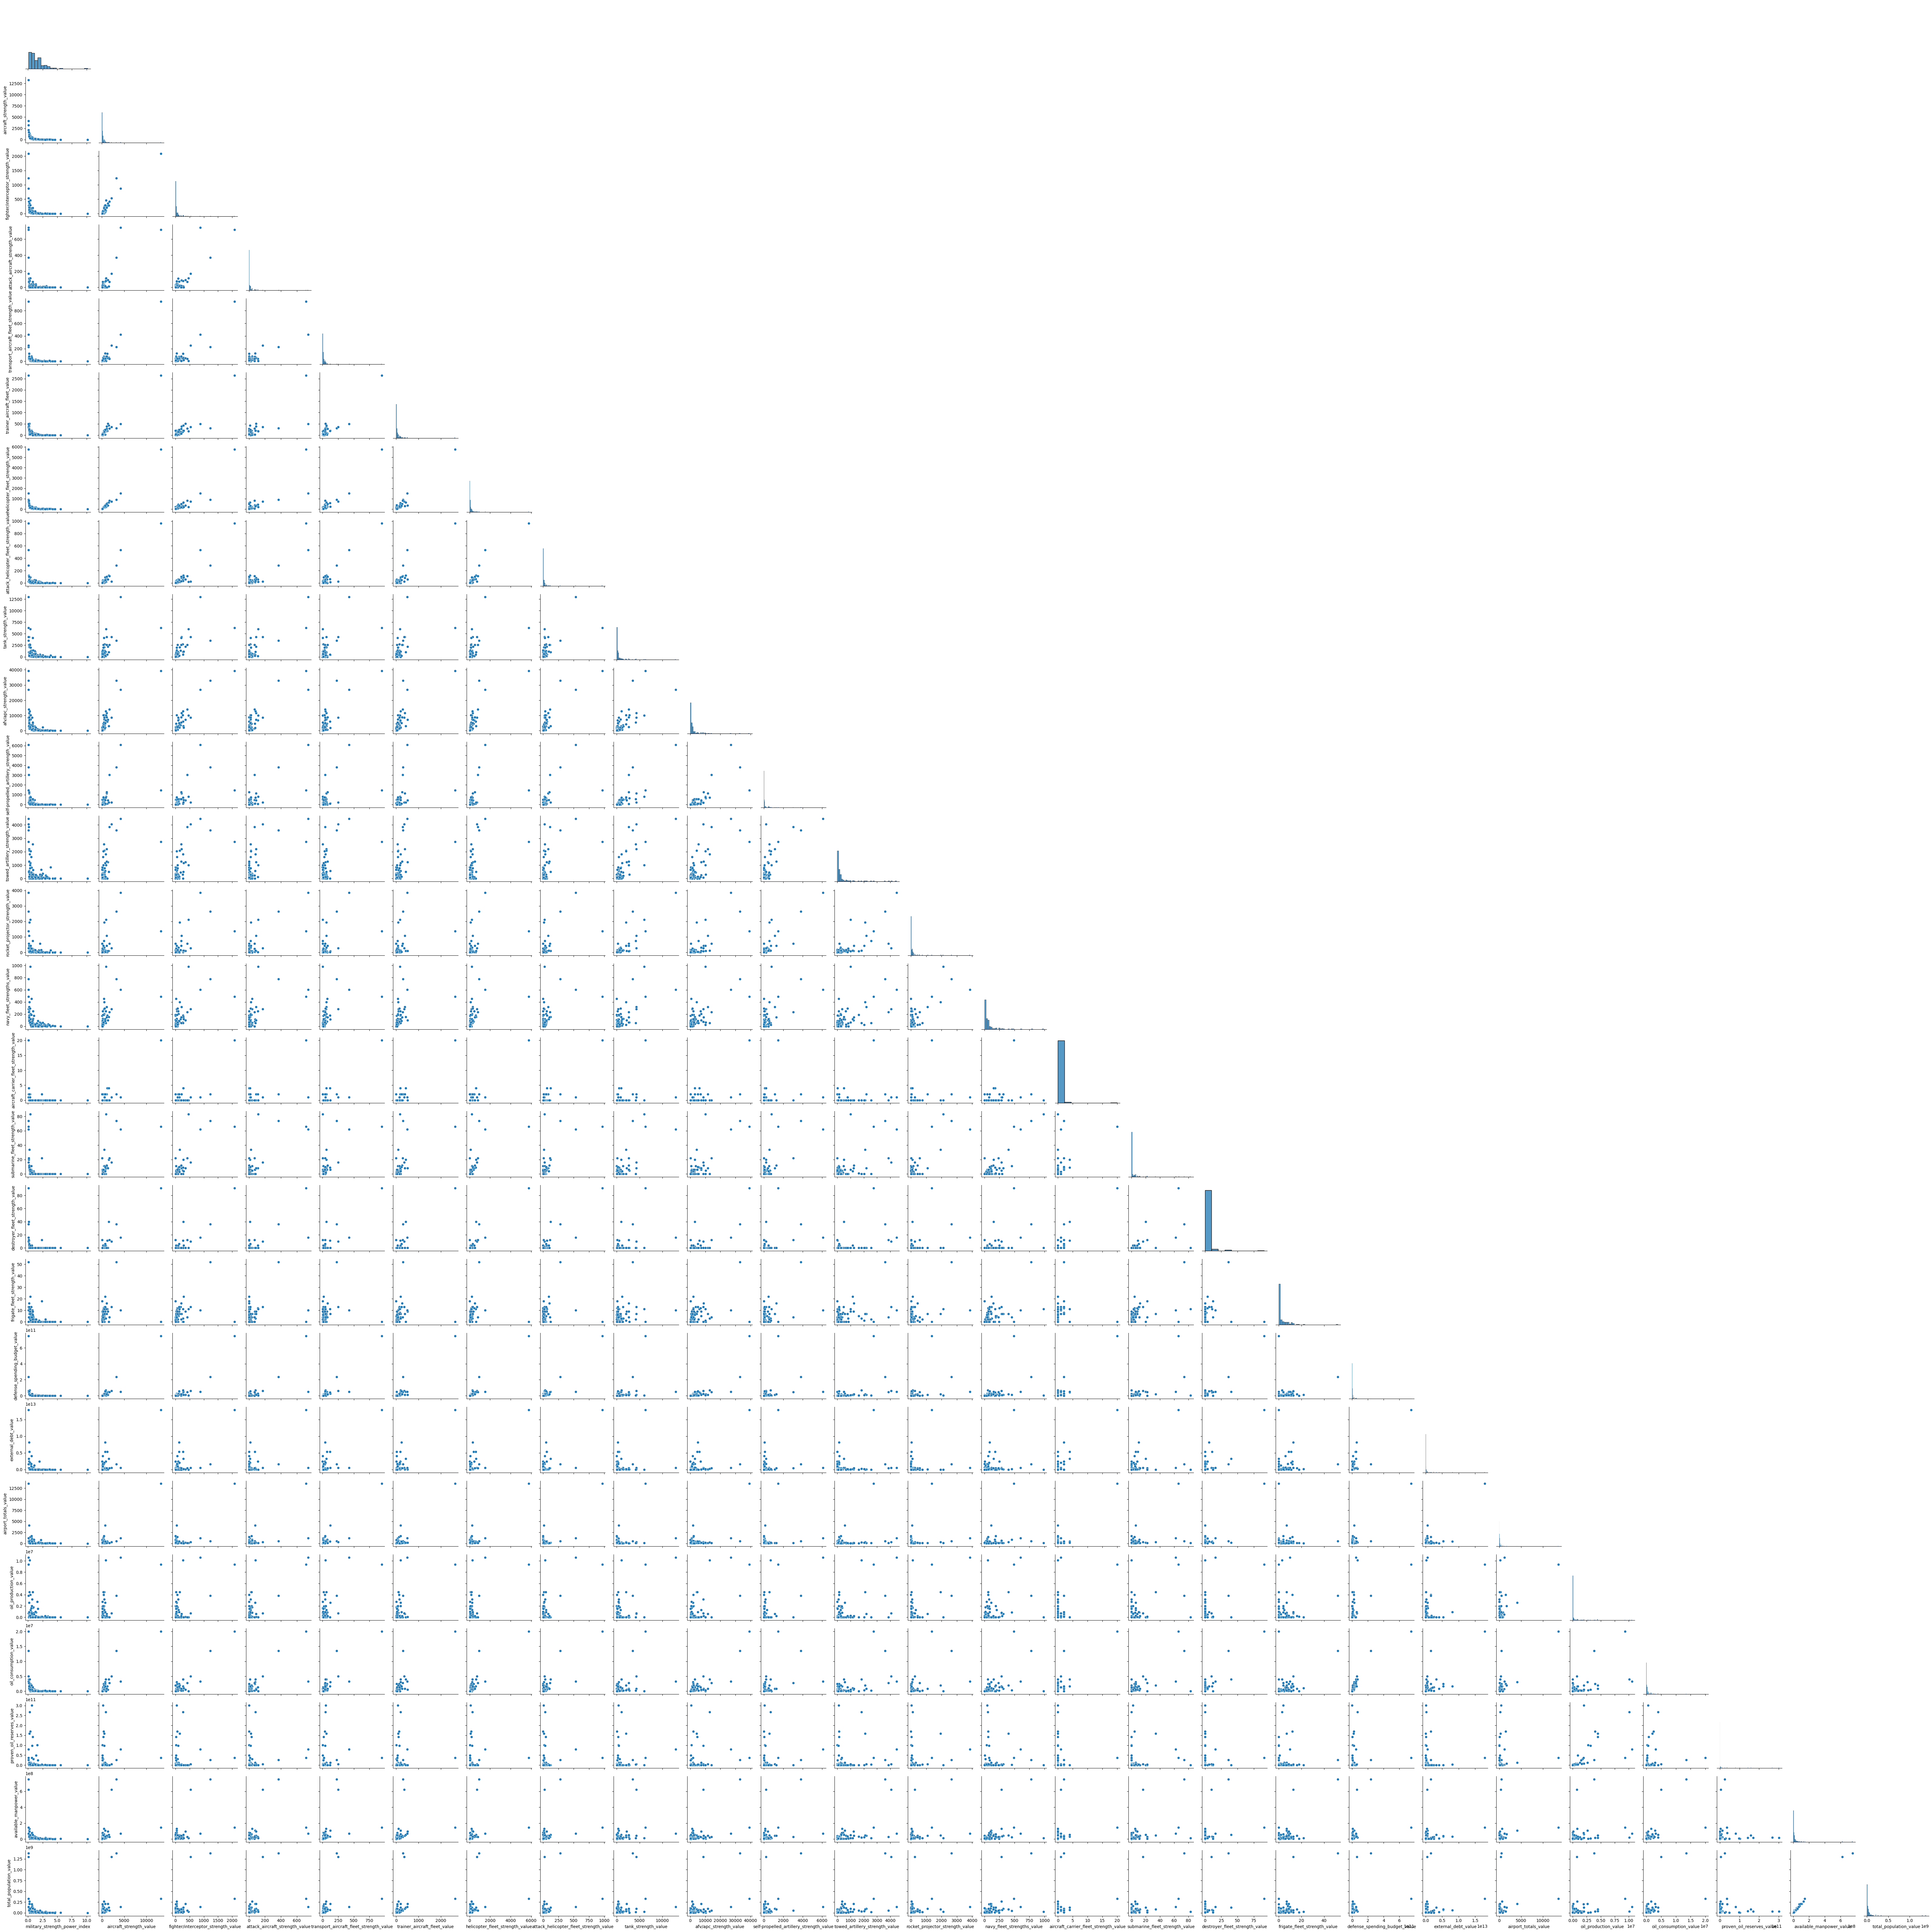

In [452]:
sns.pairplot(df, palette="inferno", corner=True);

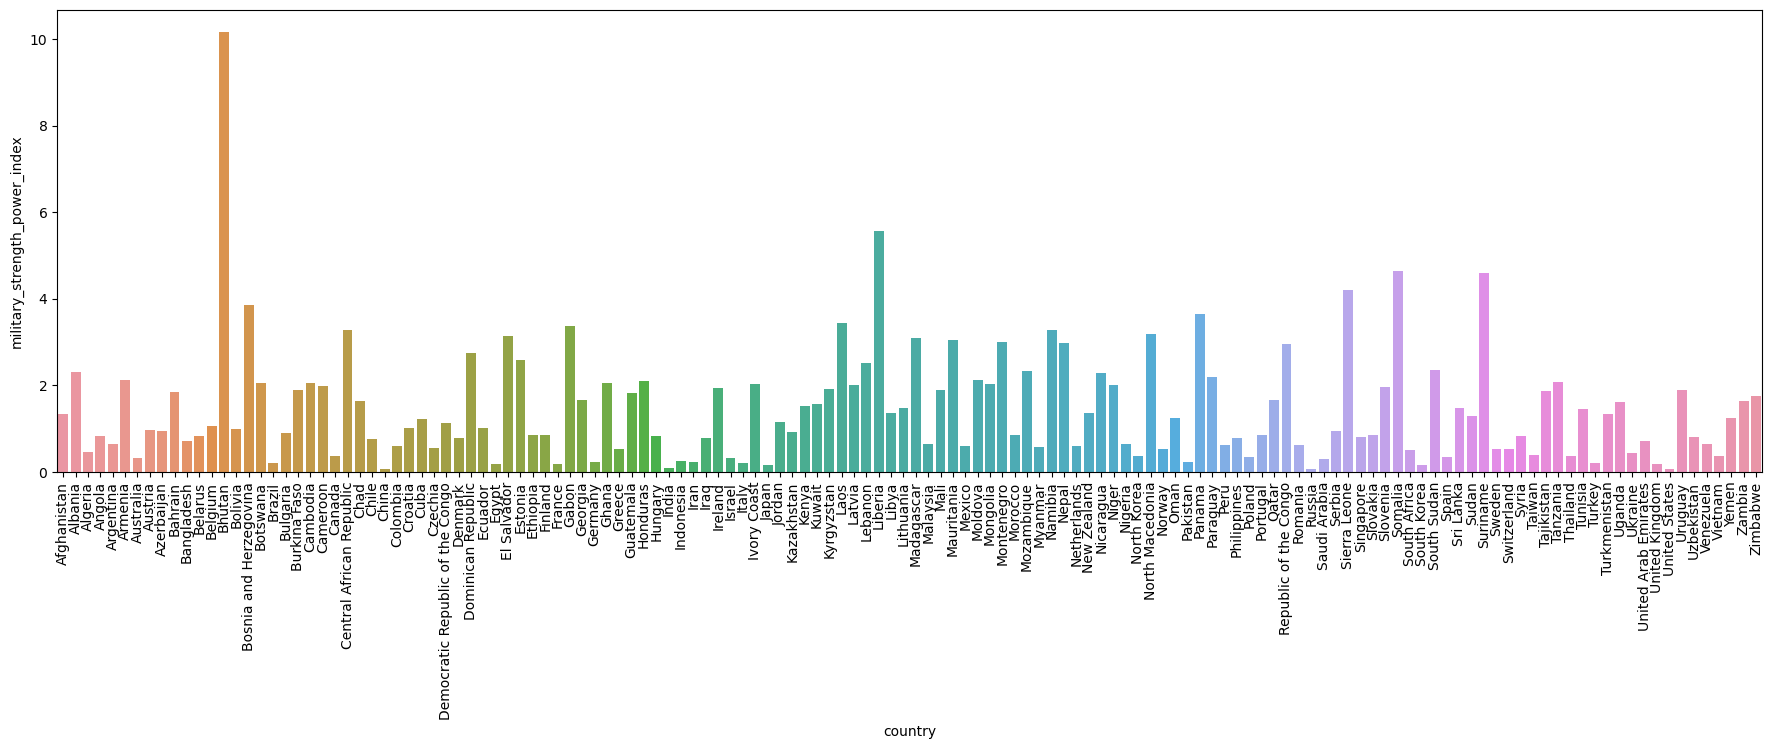

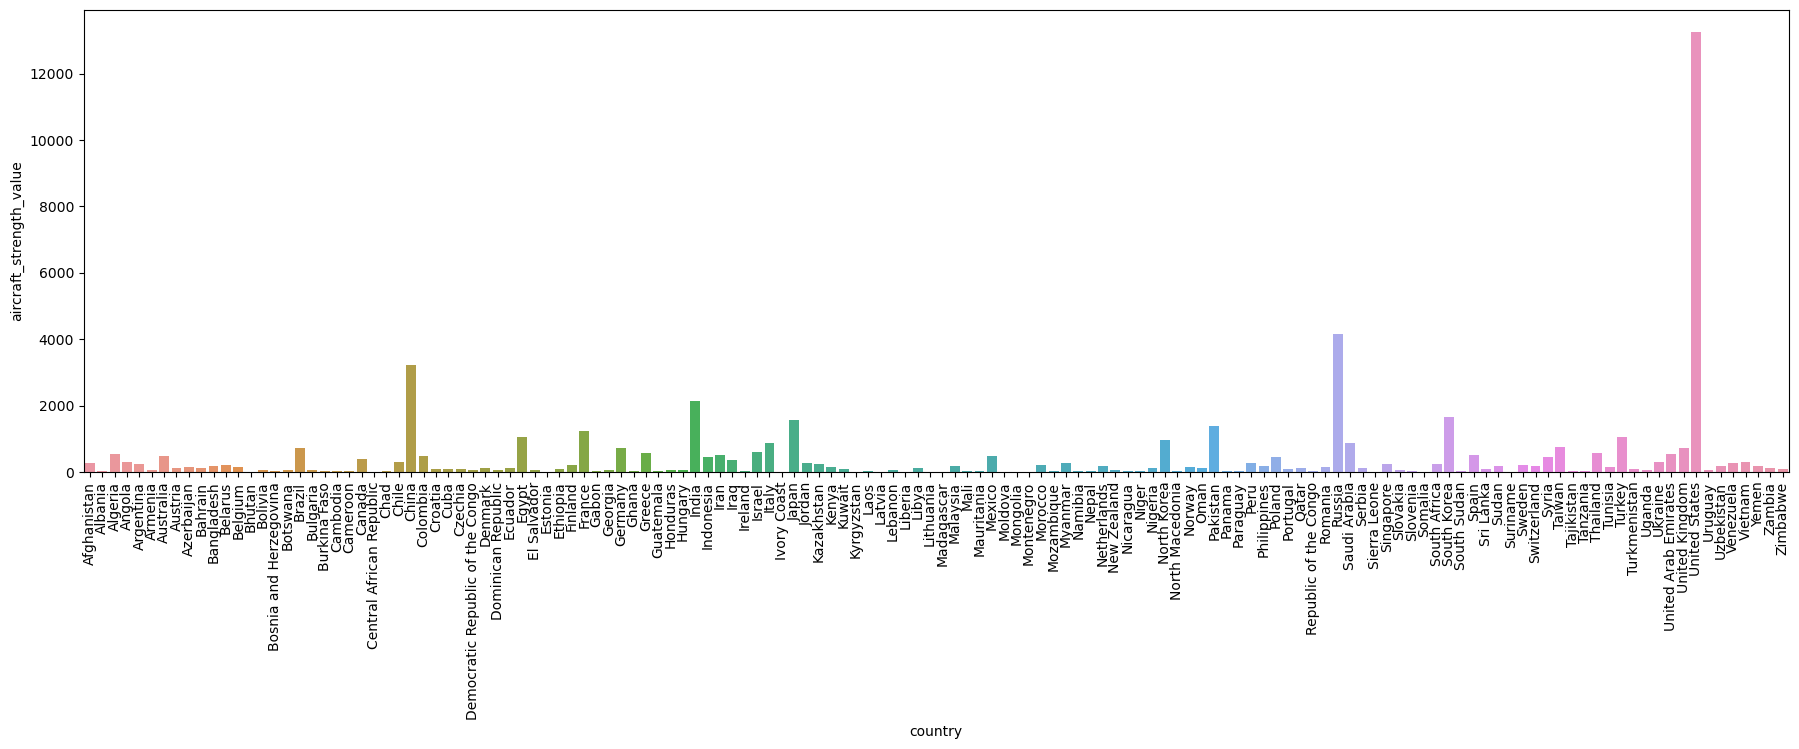

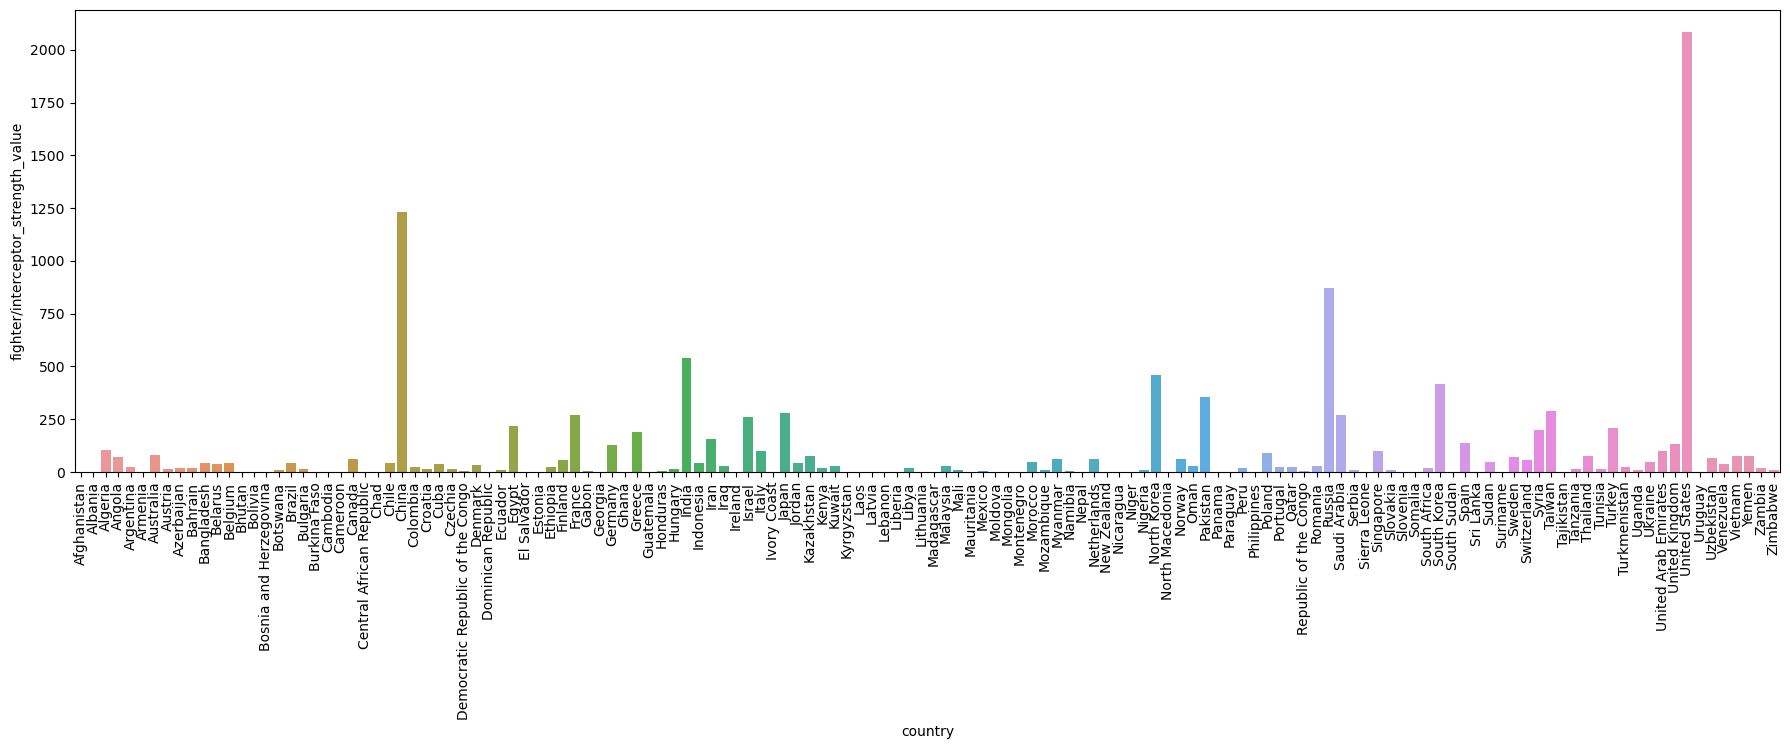

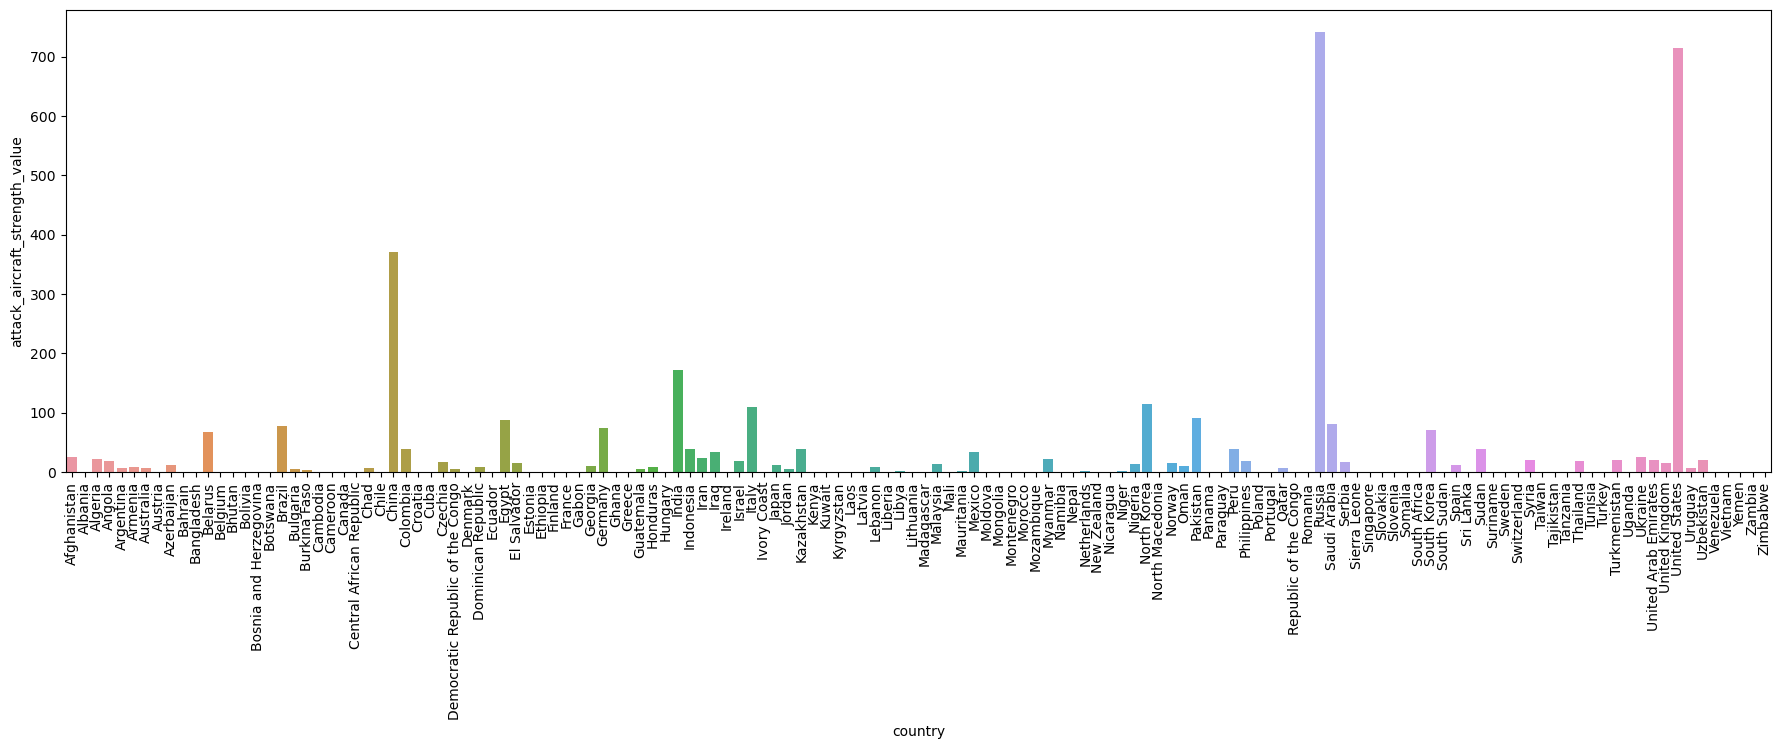

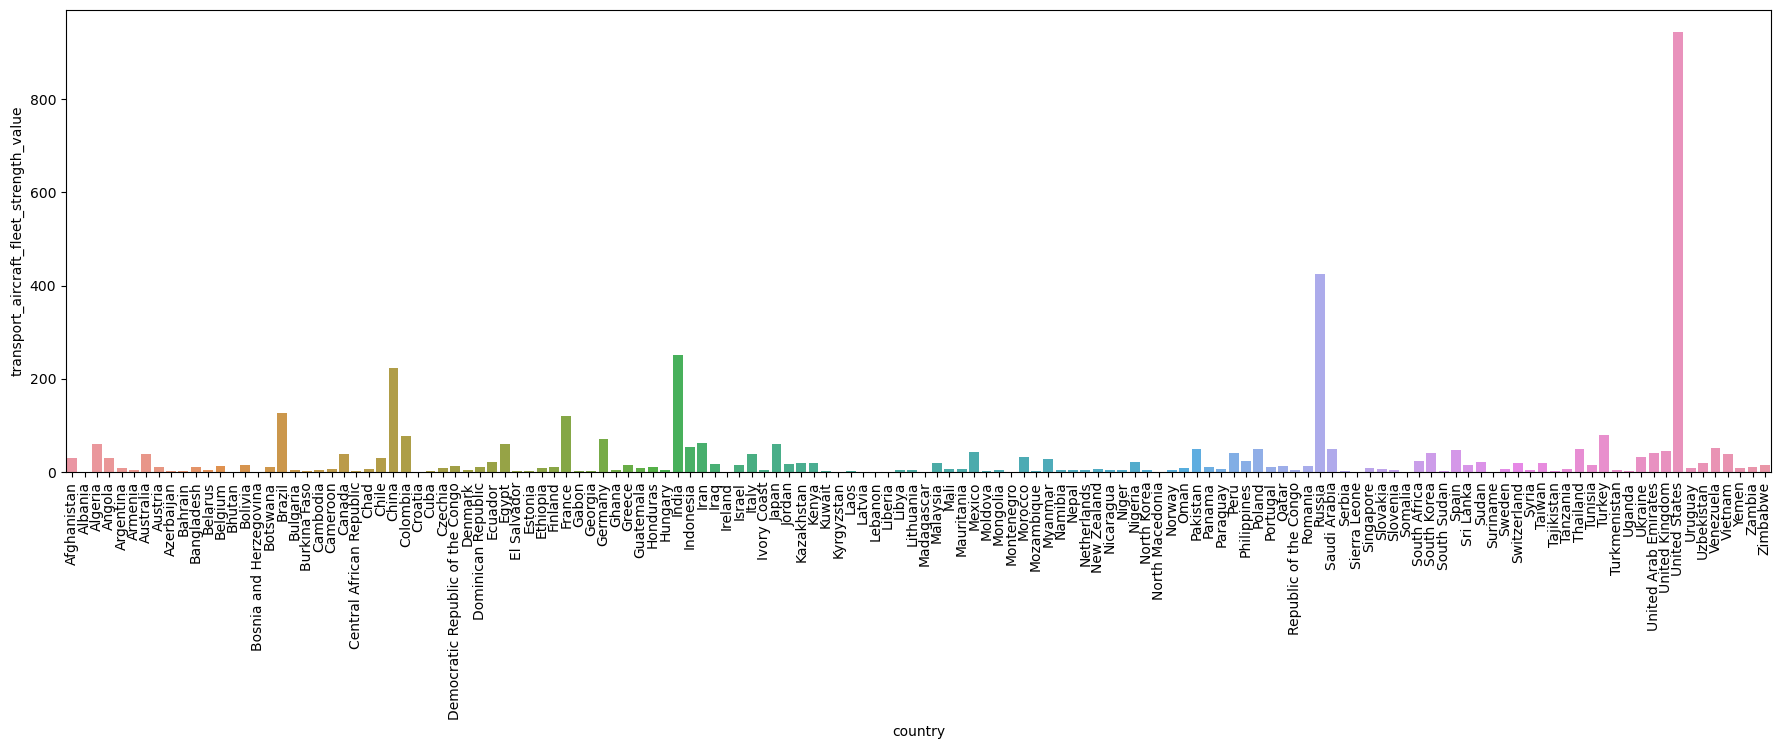

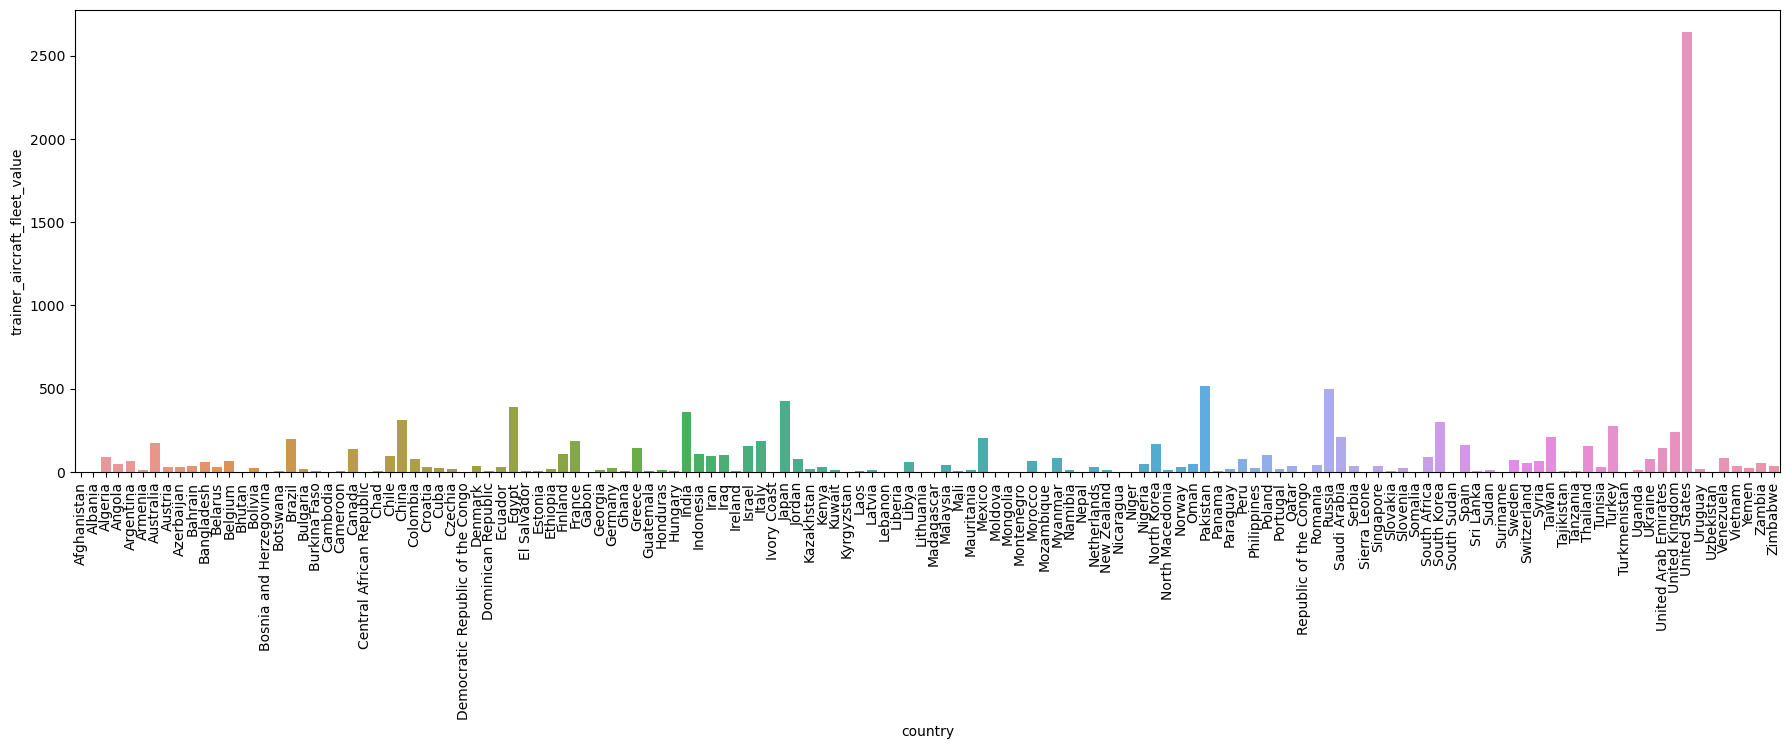

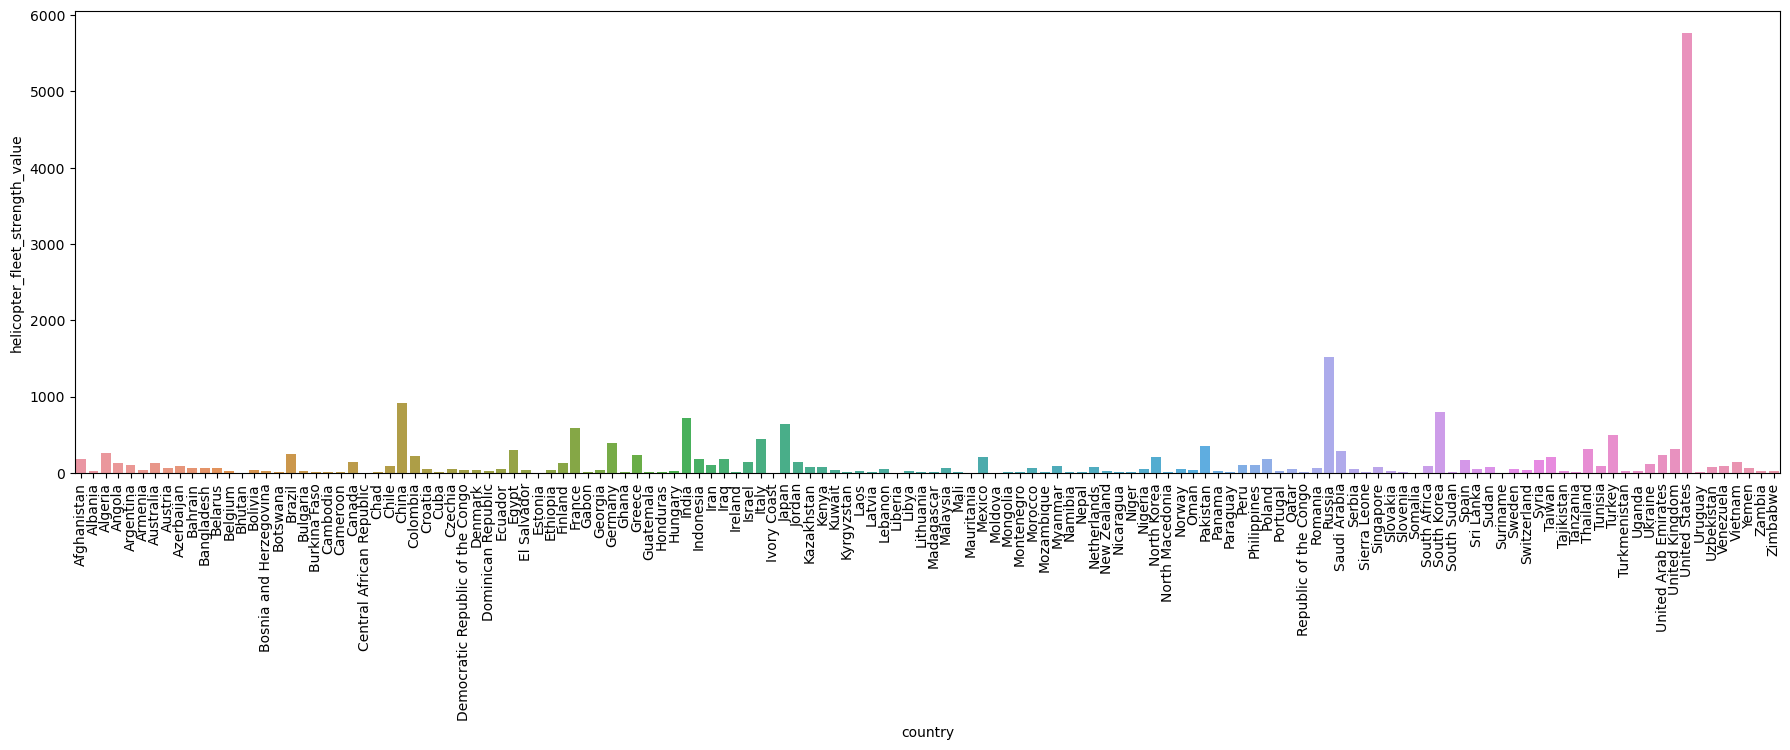

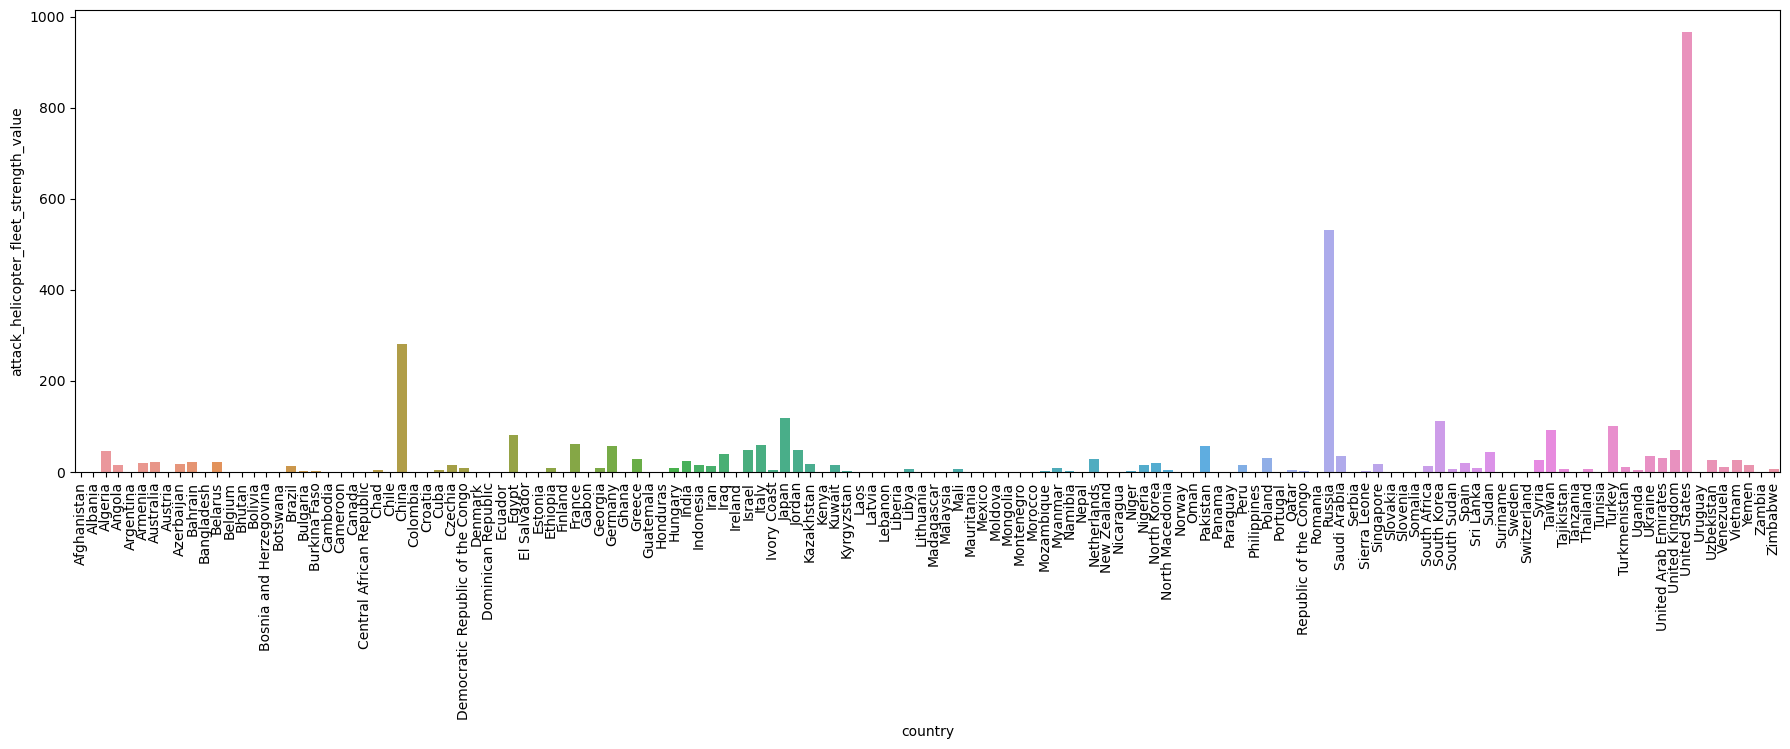

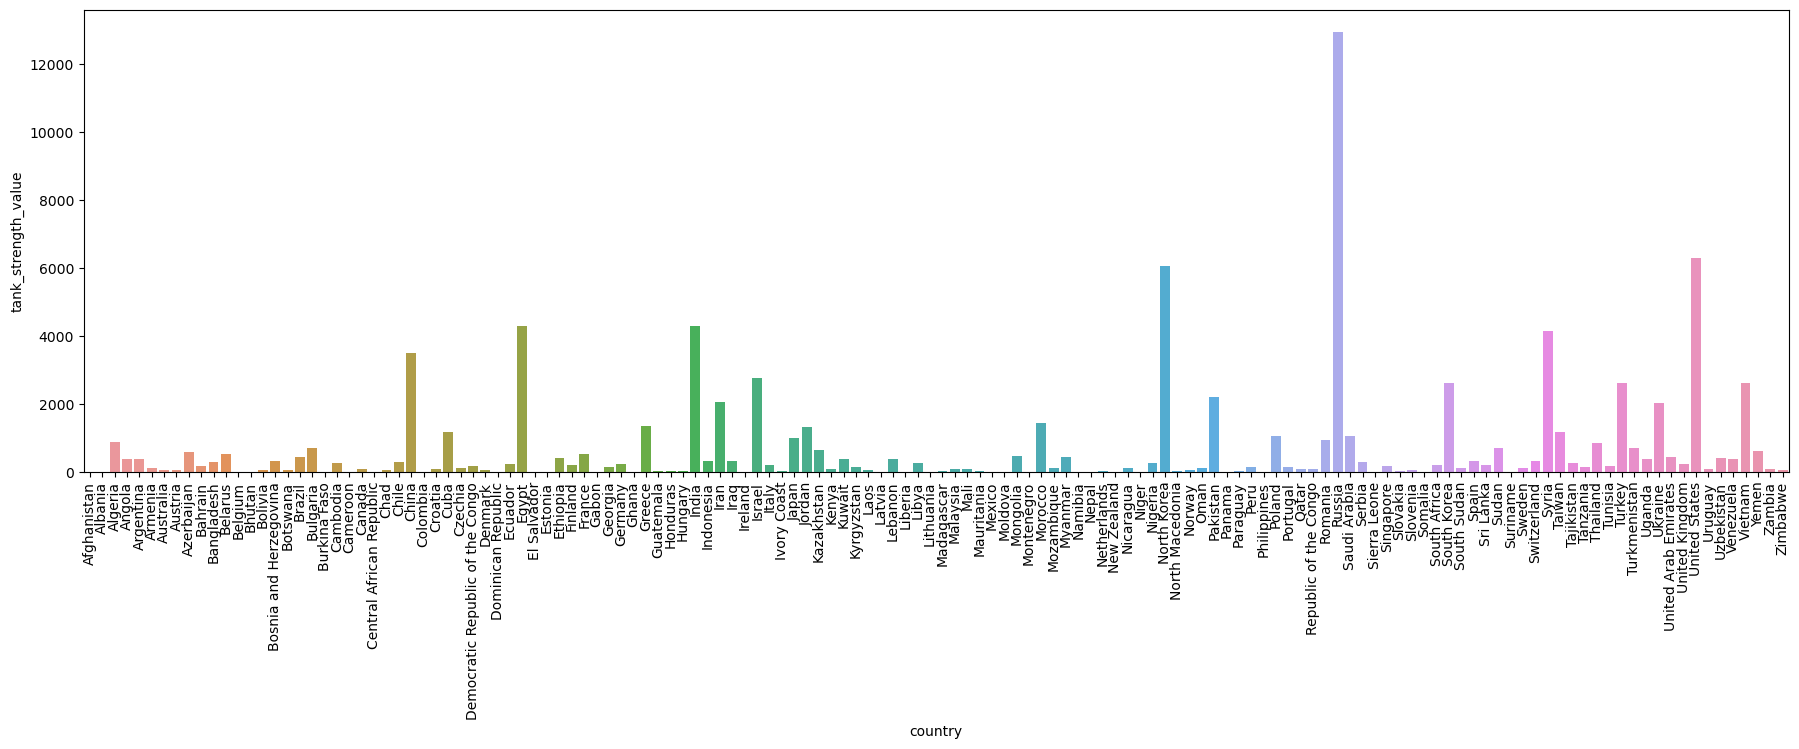

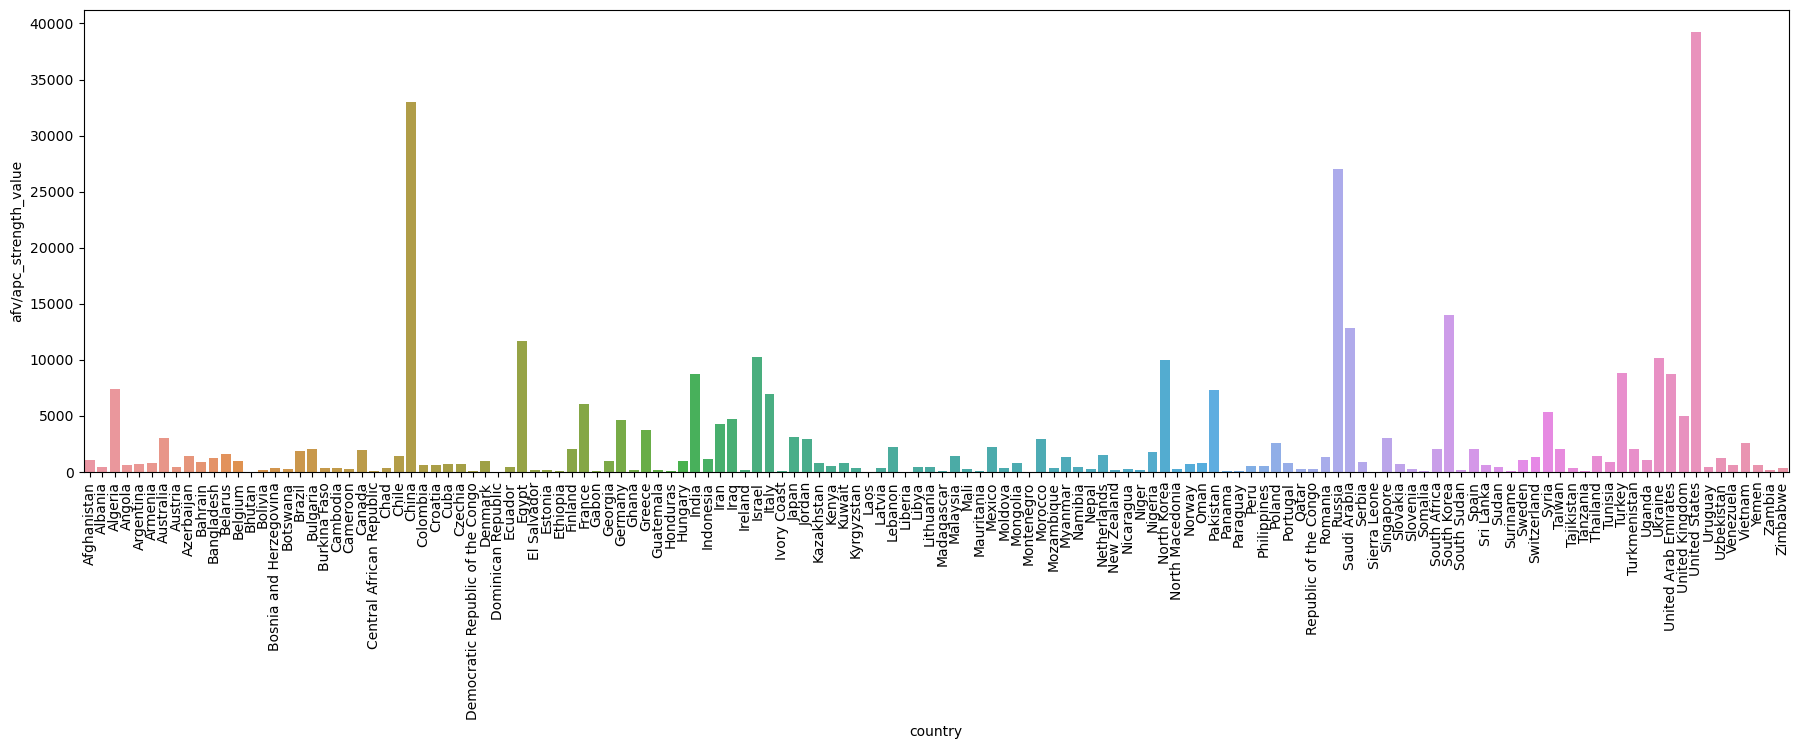

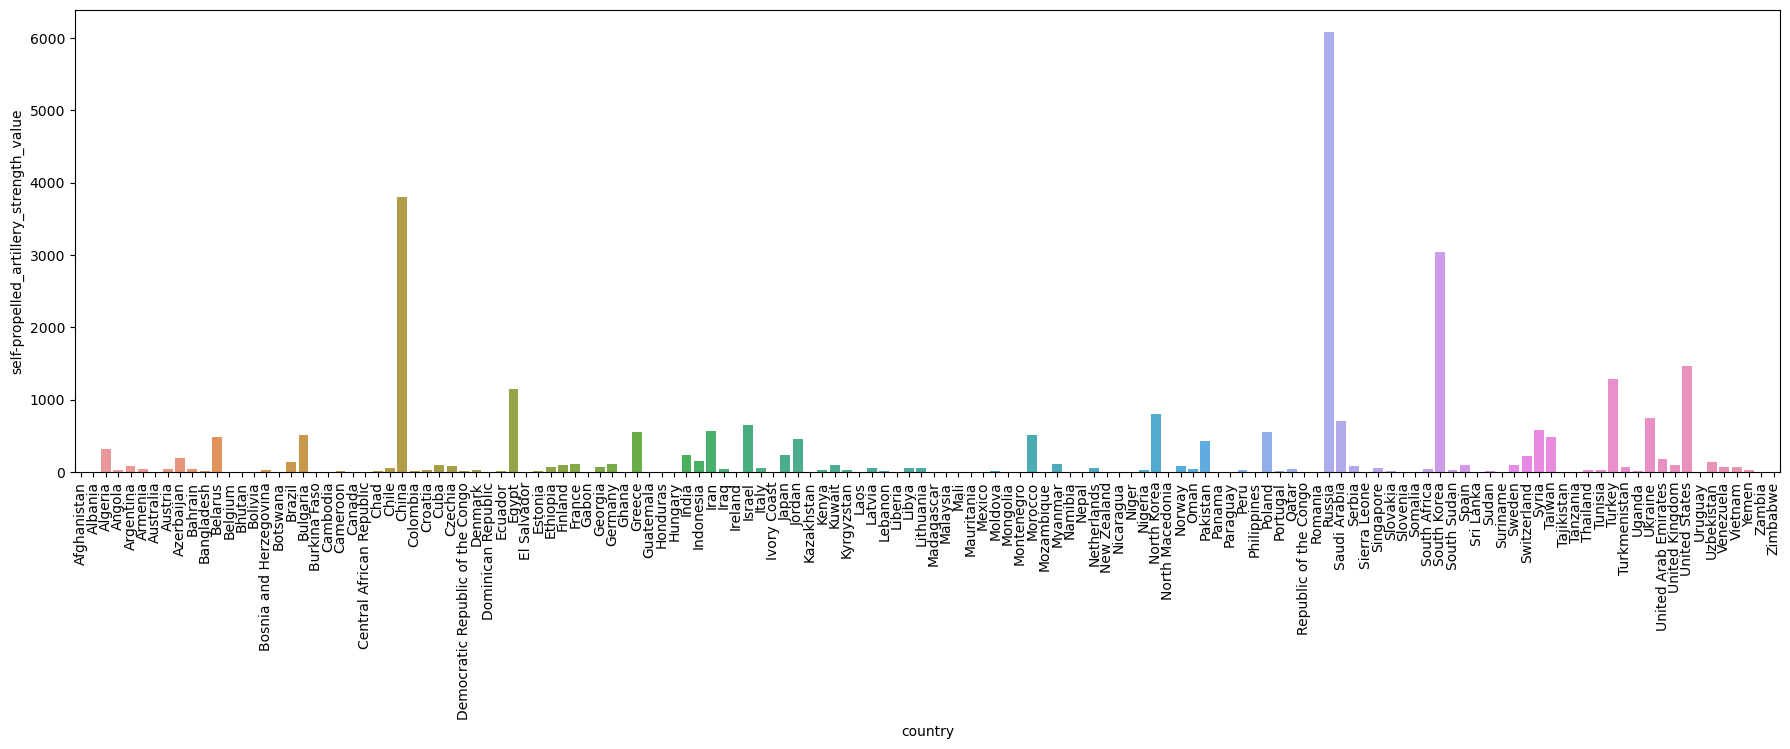

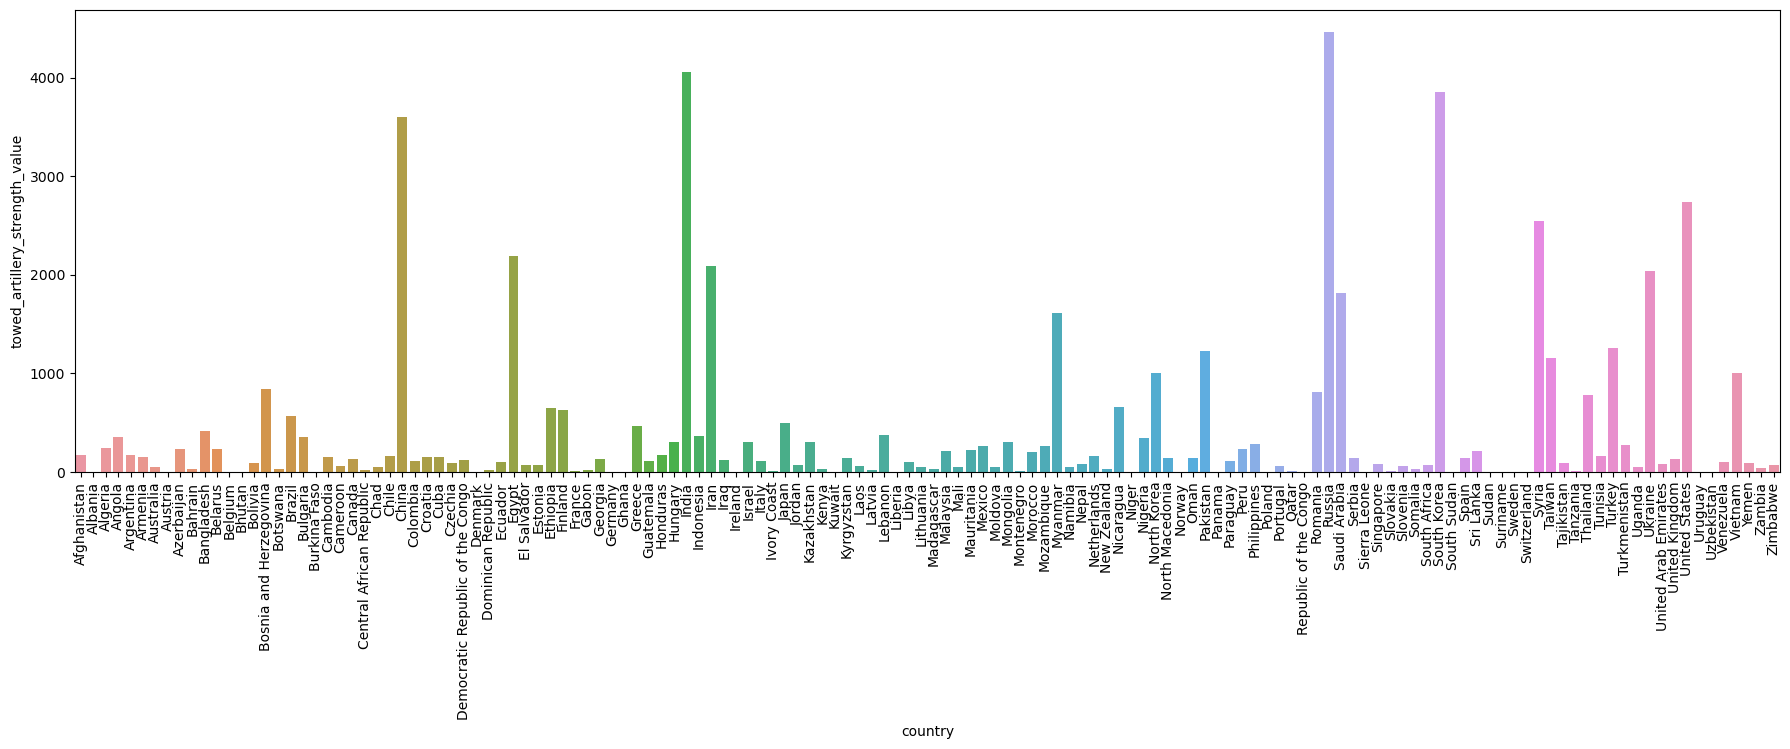

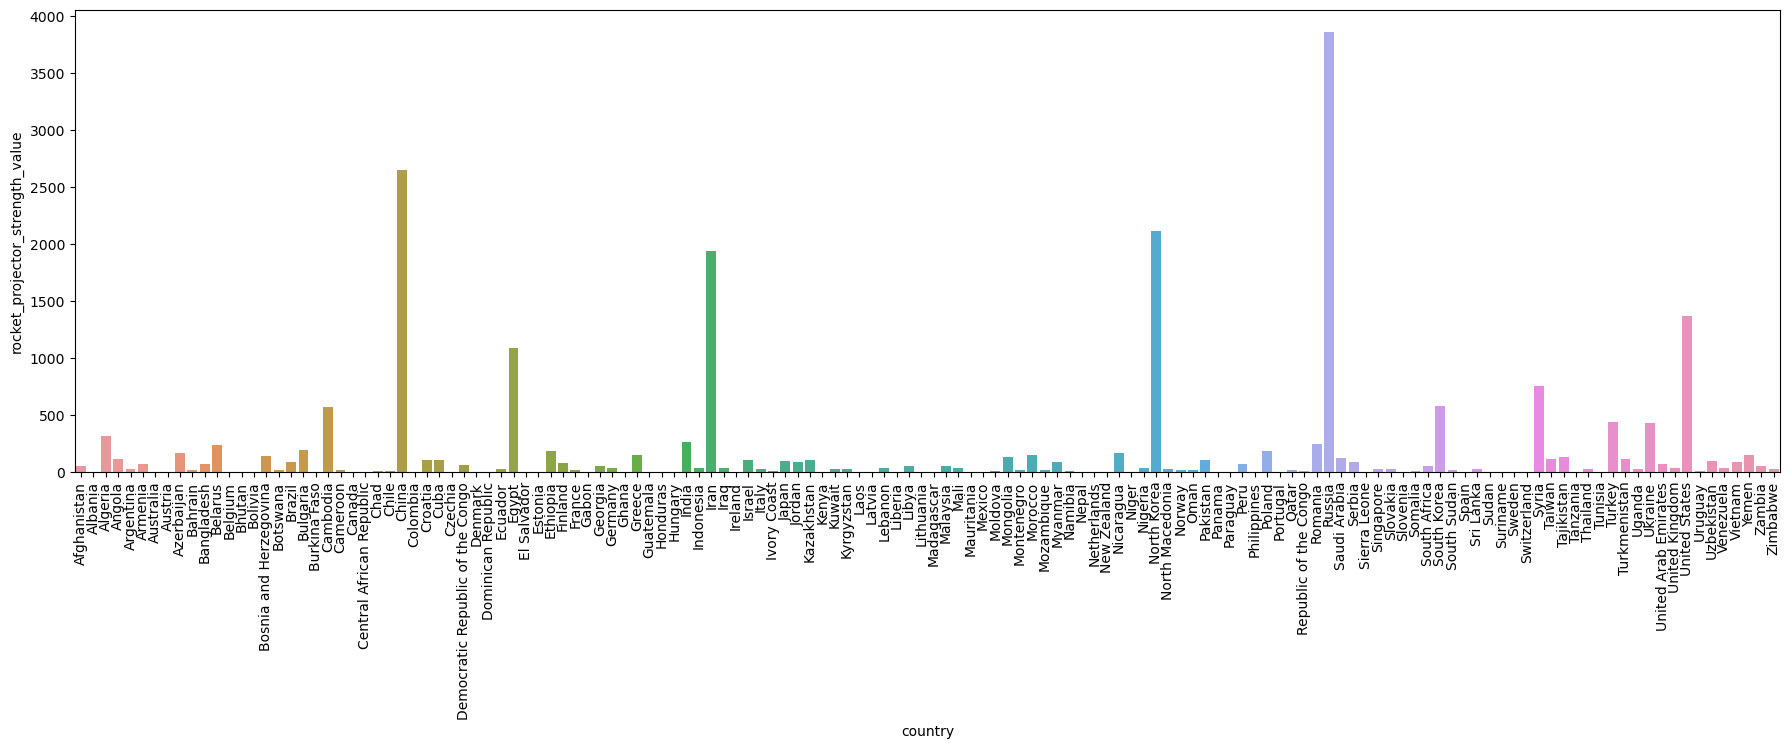

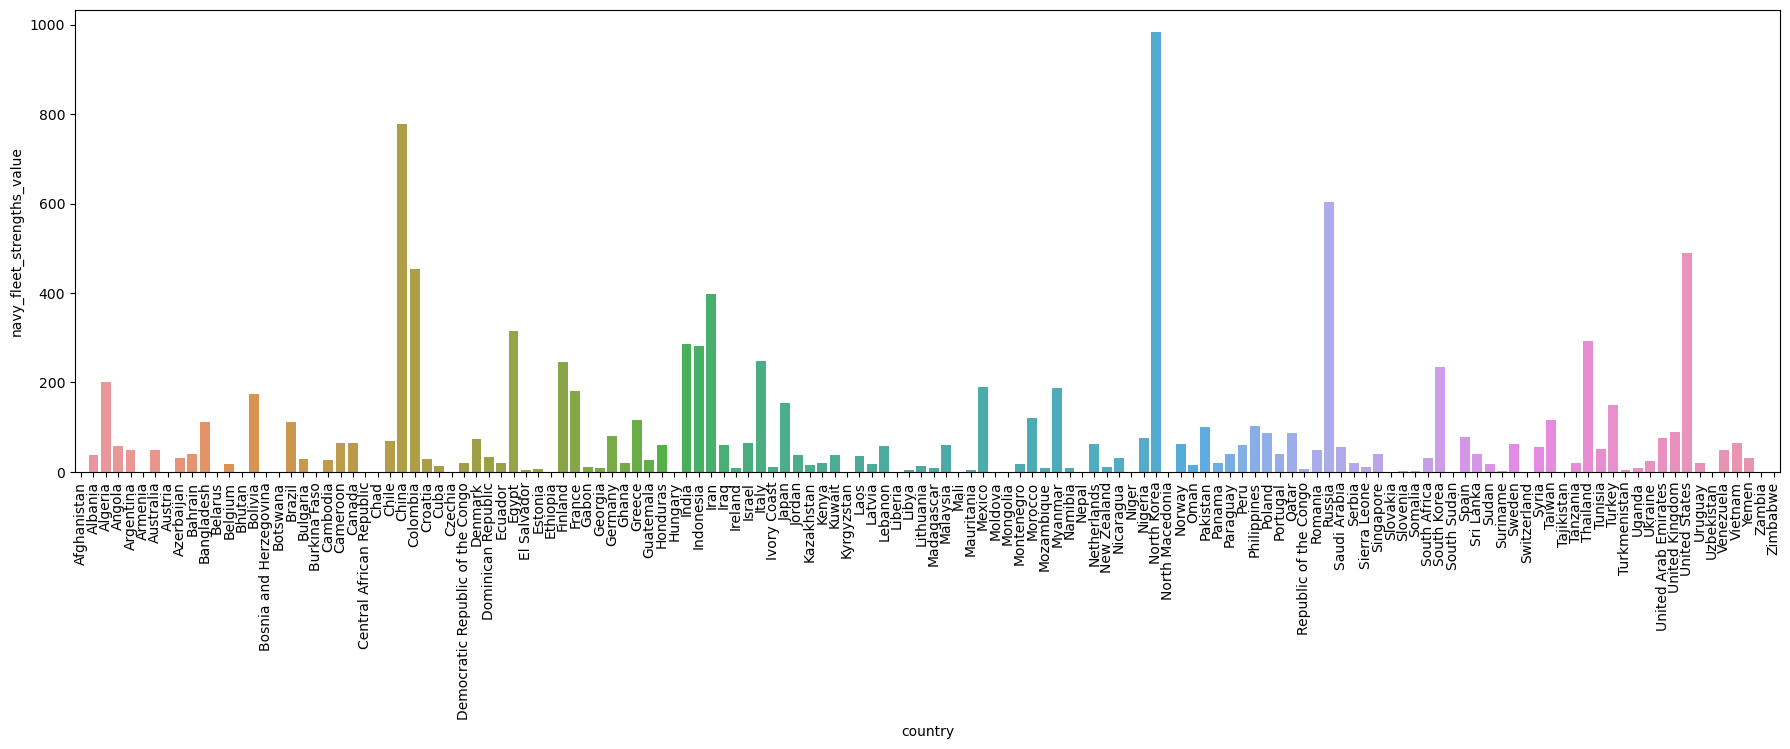

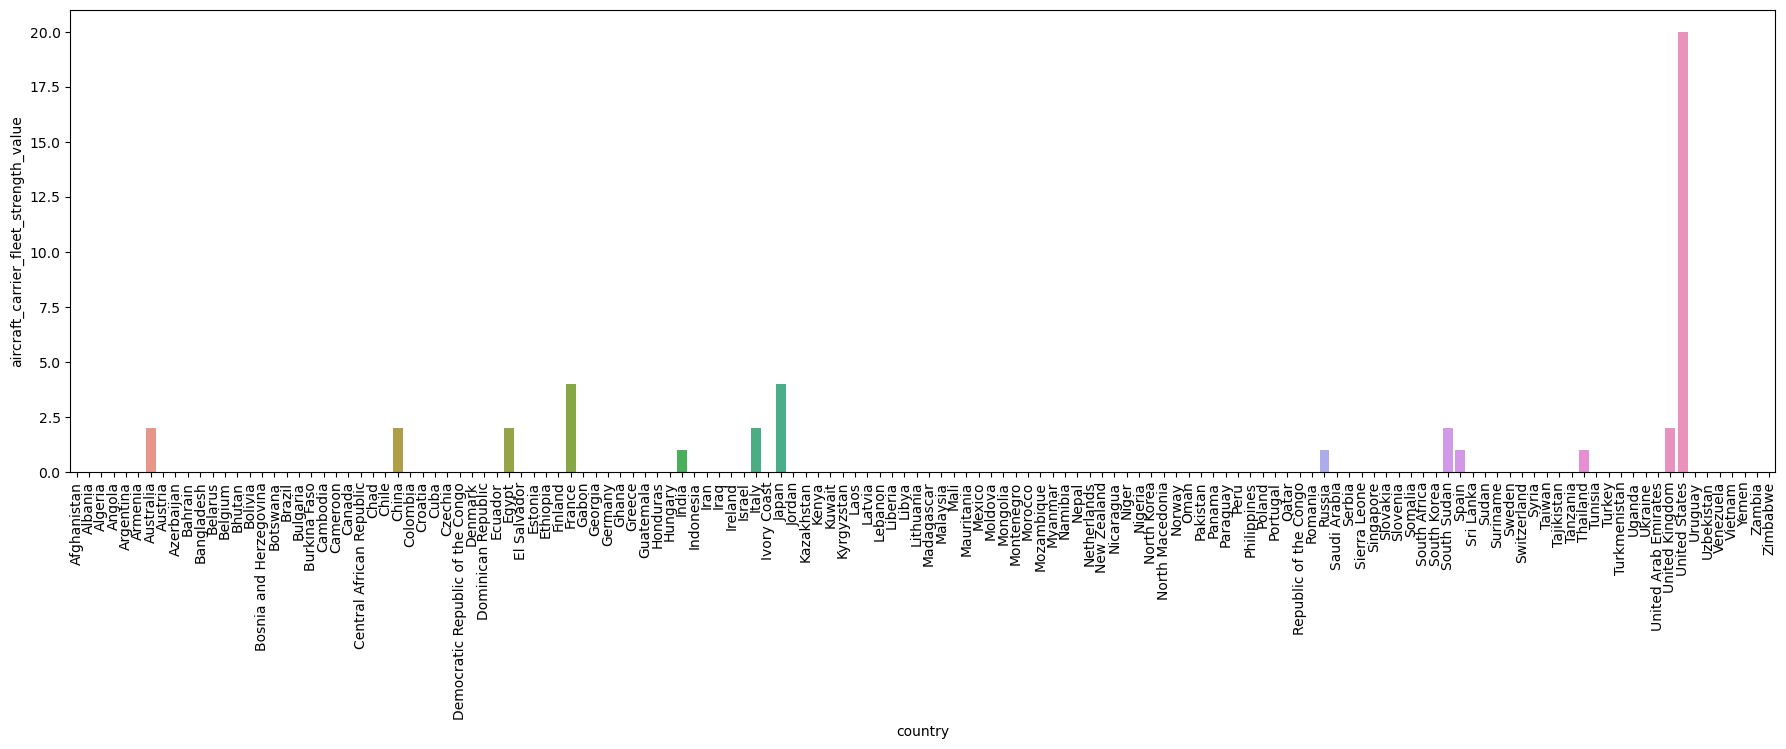

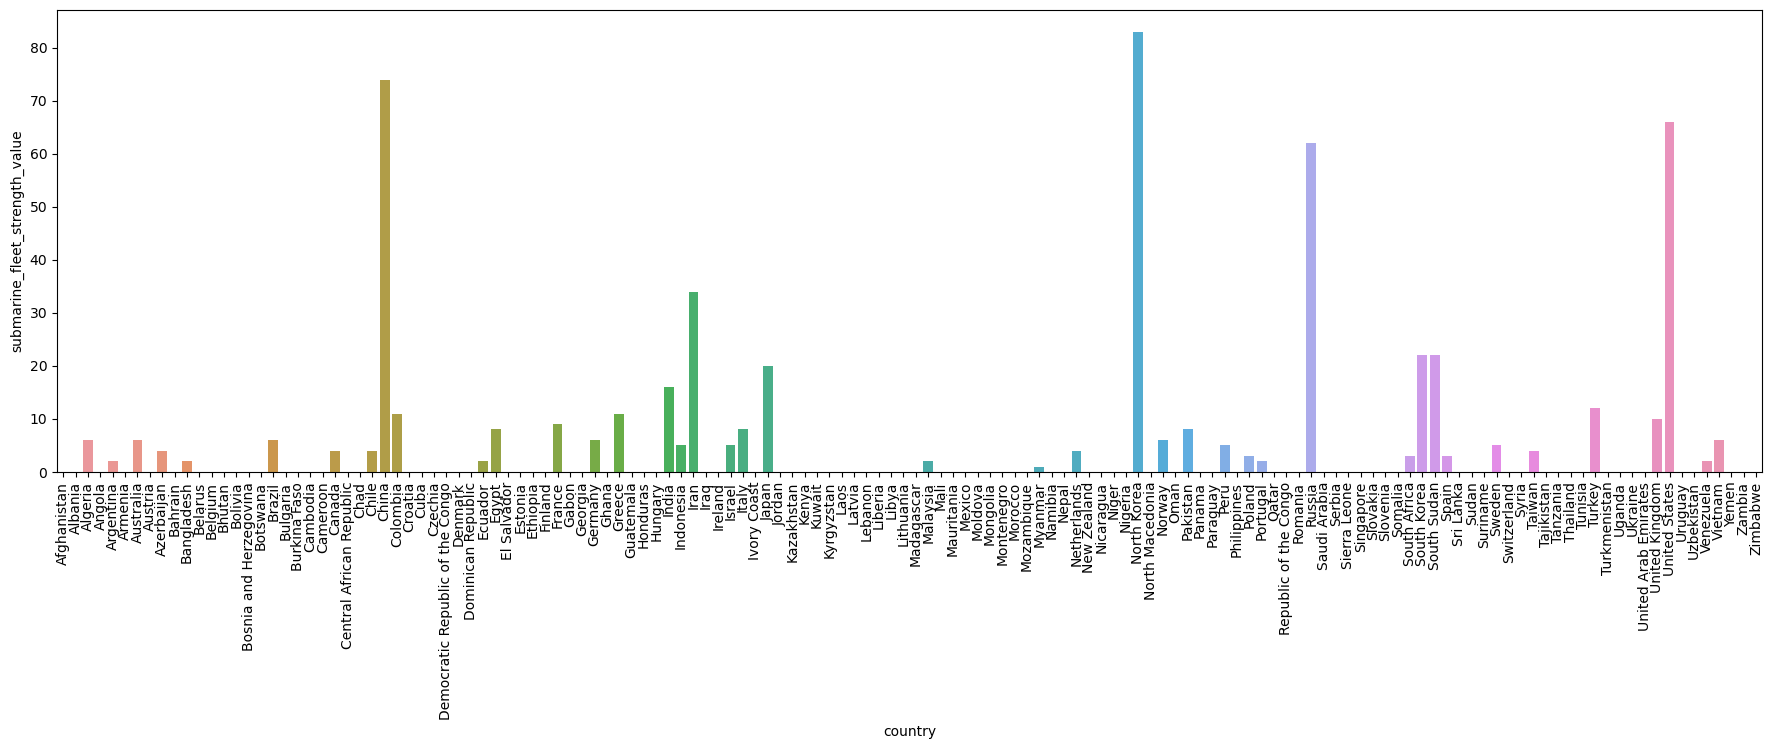

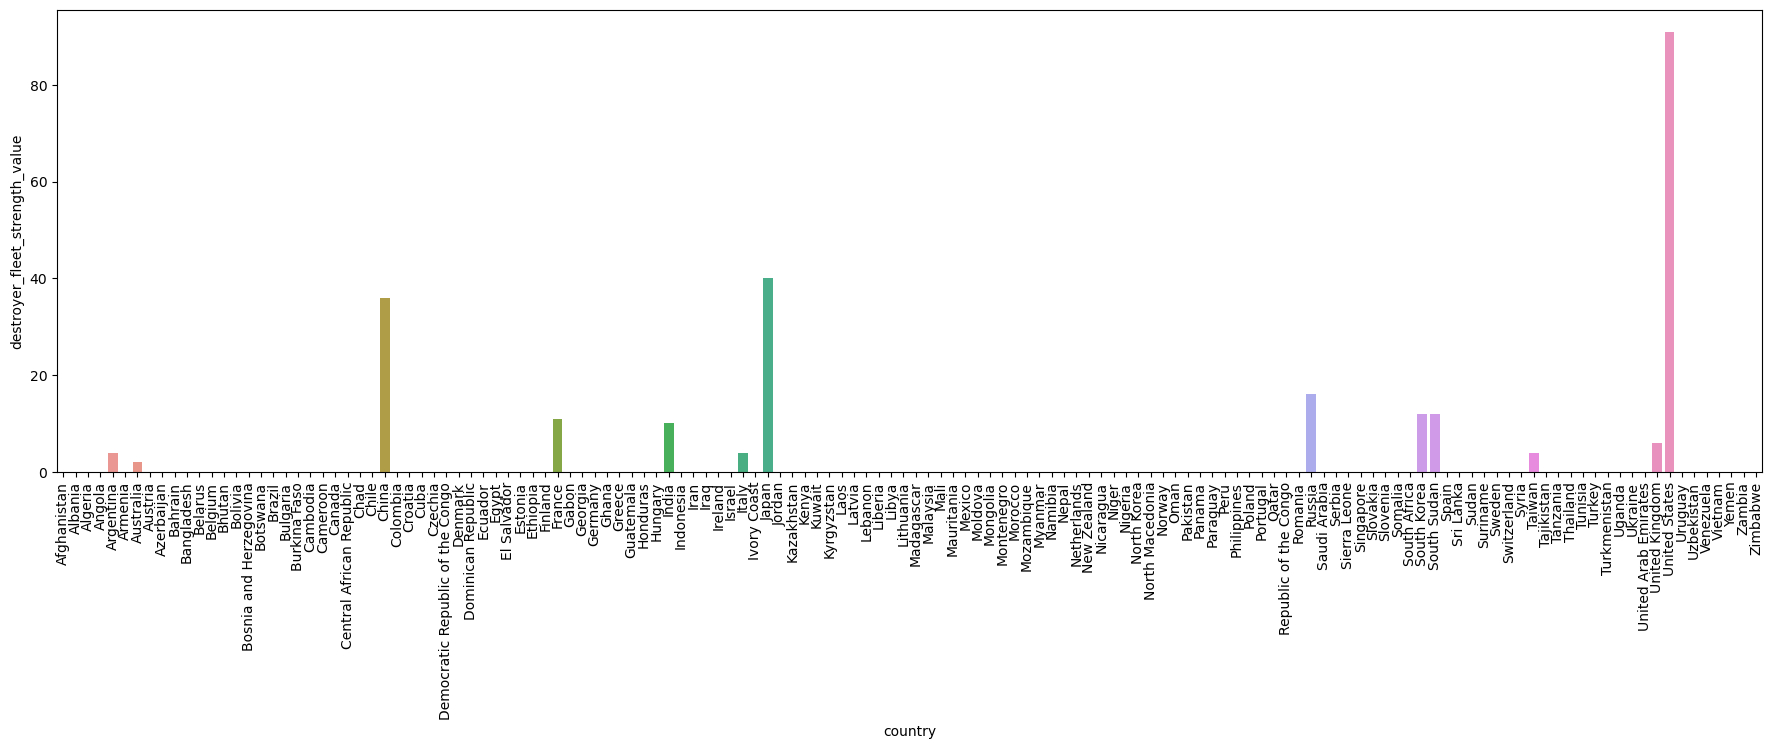

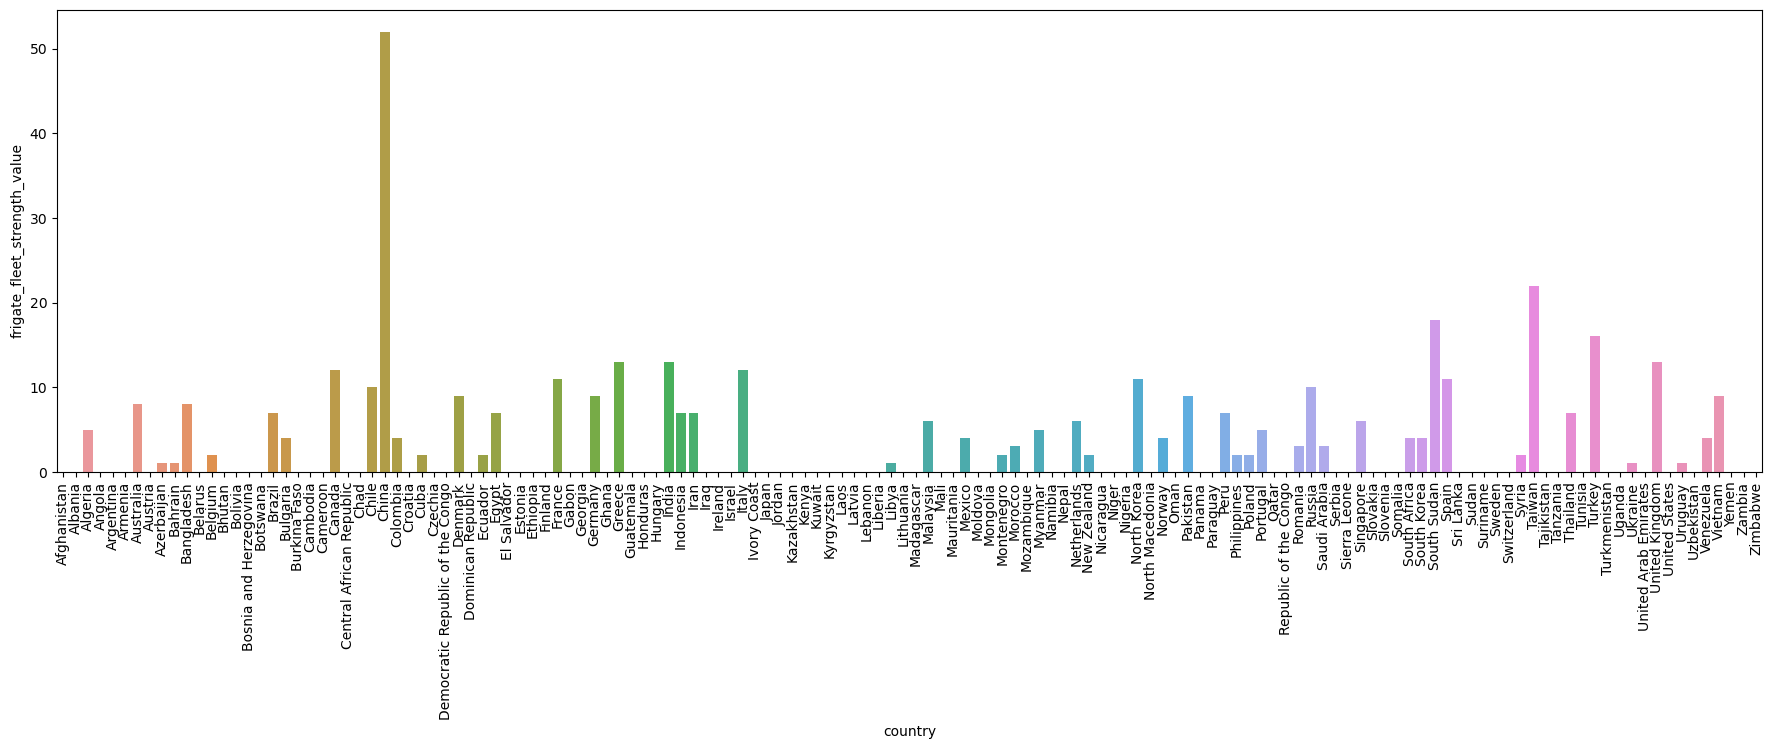

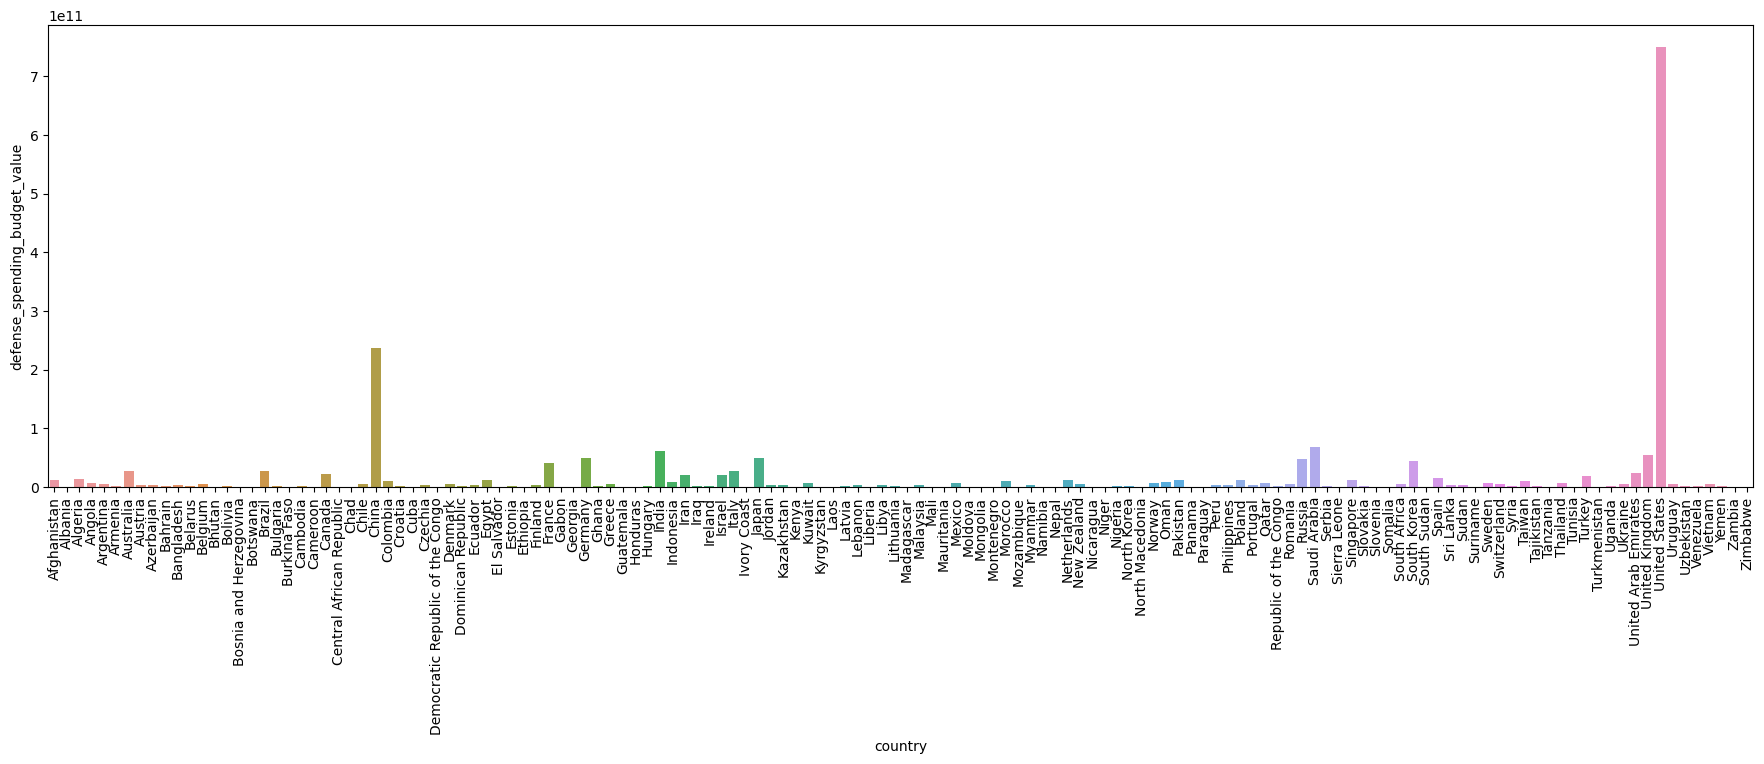

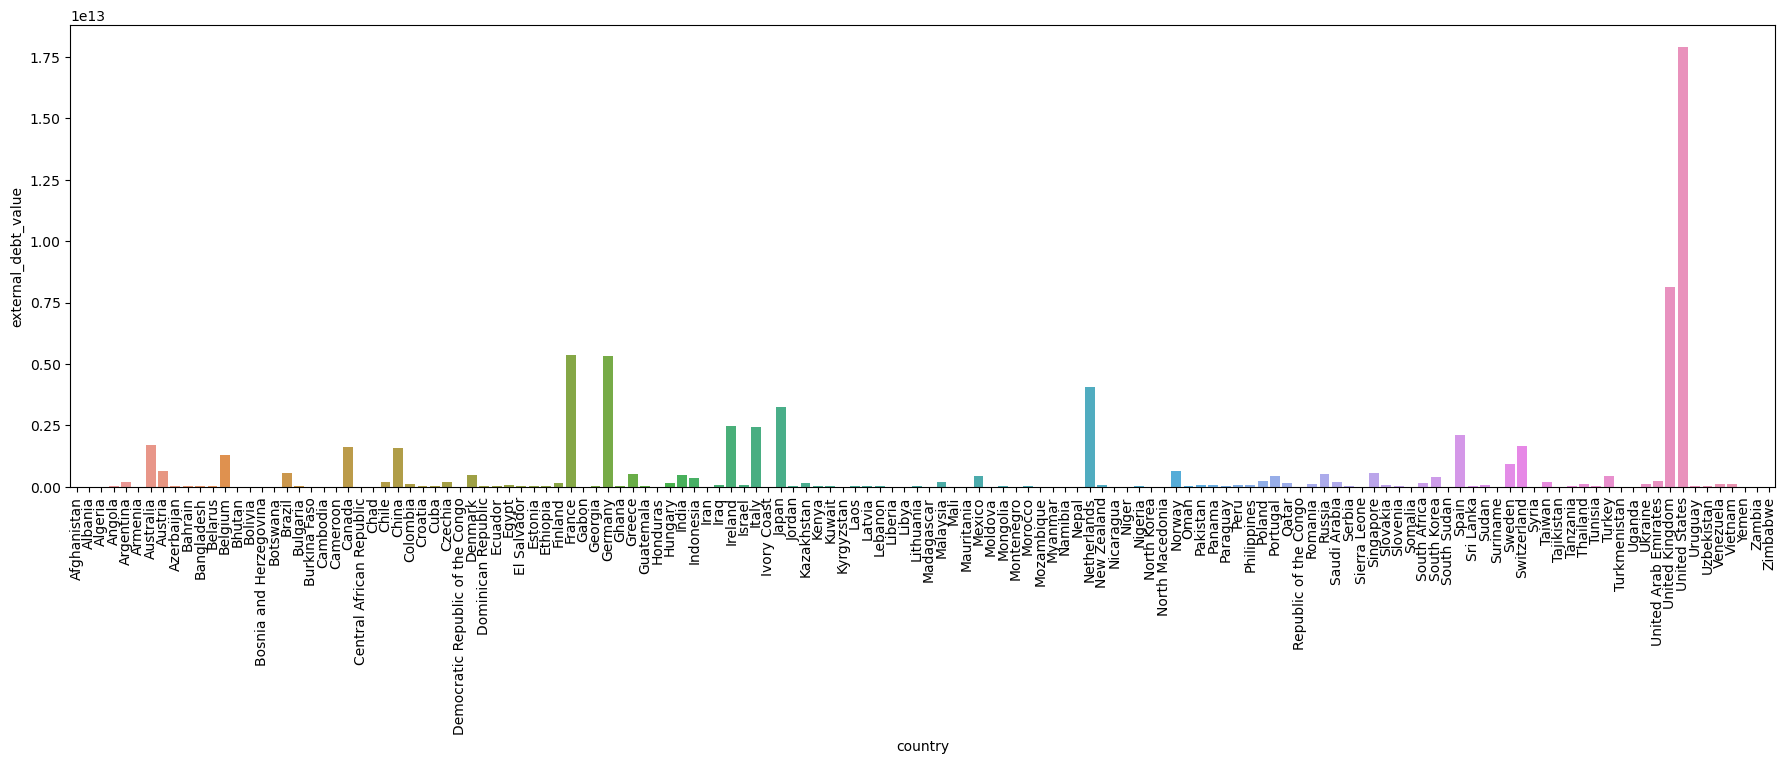

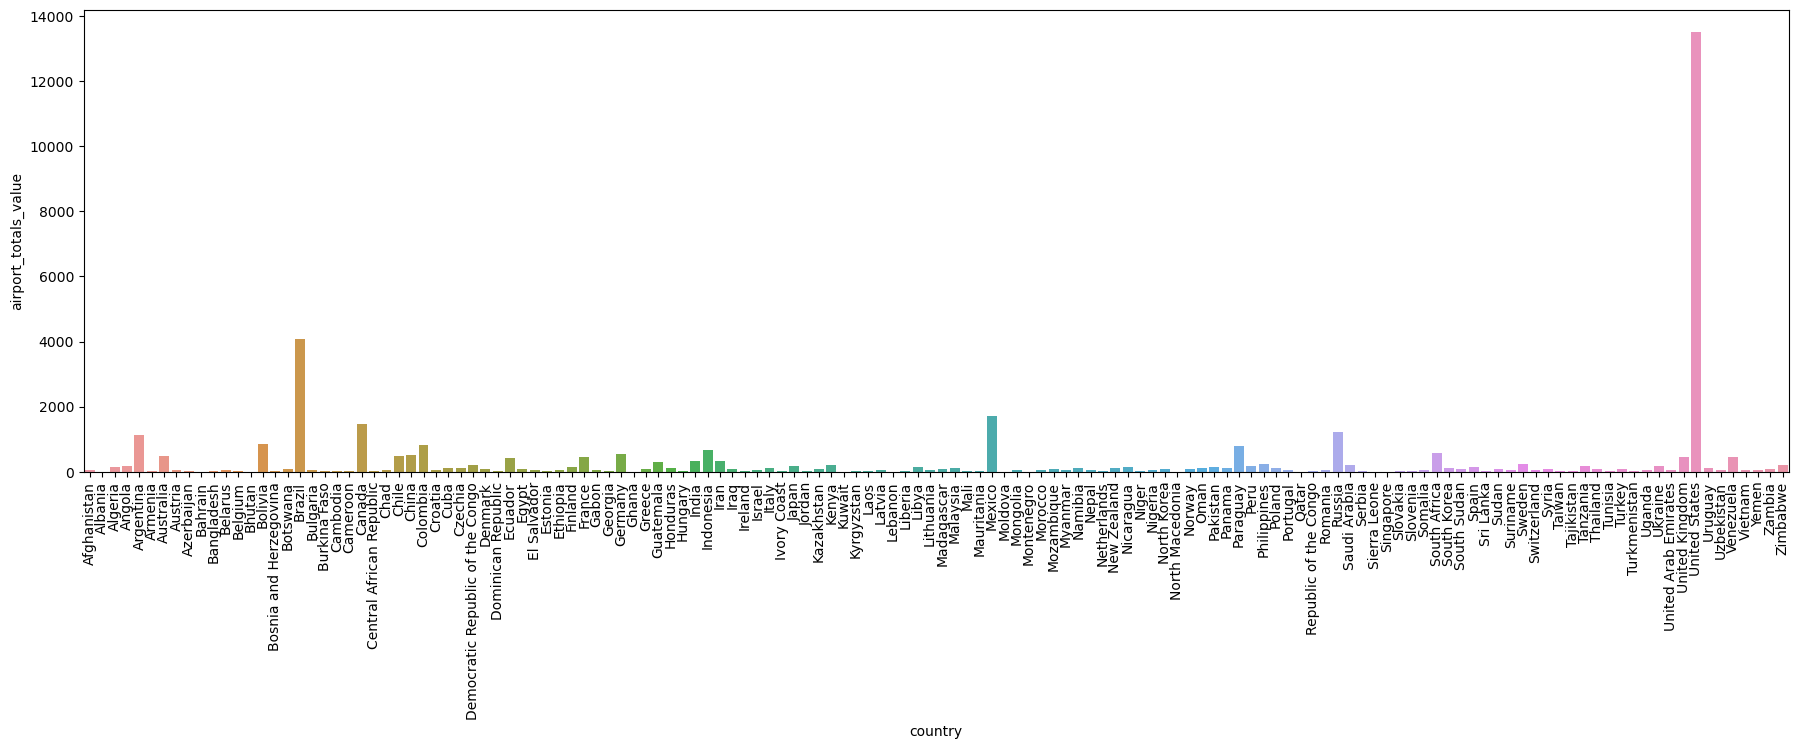

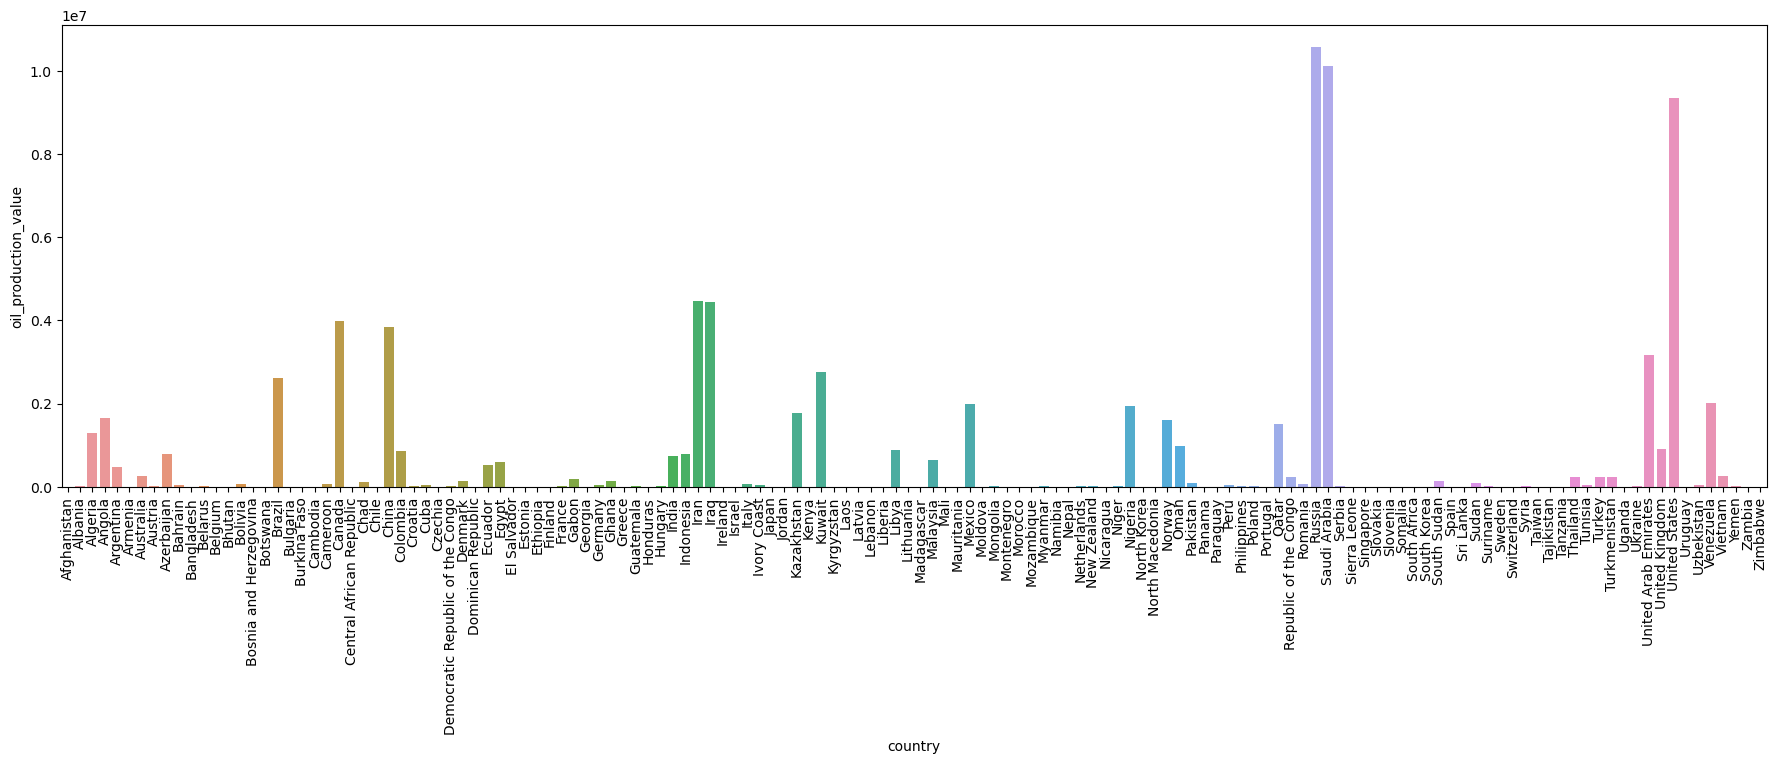

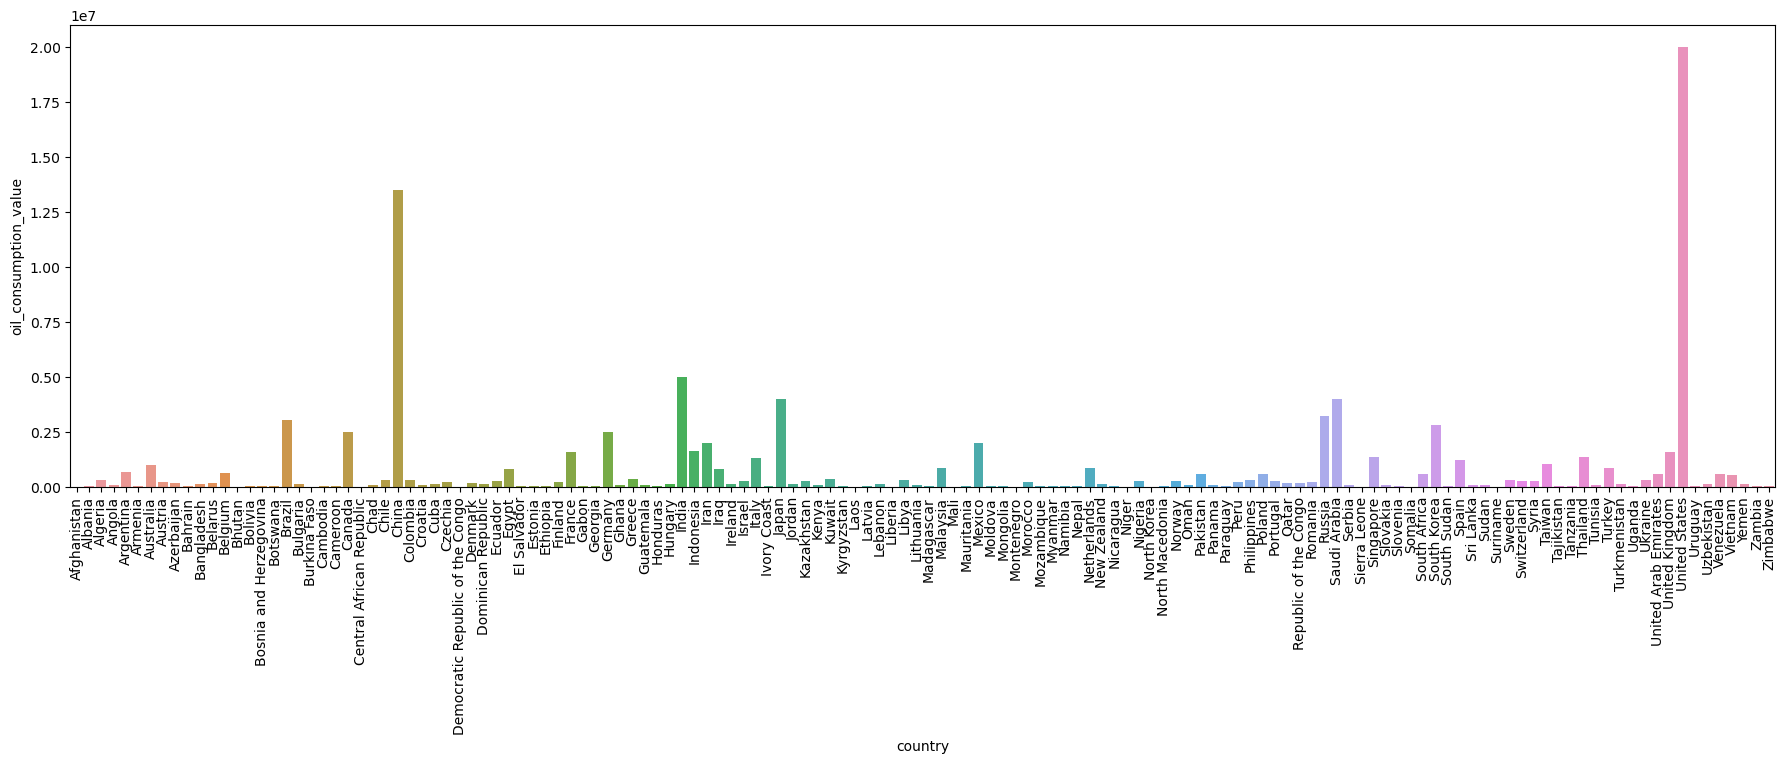

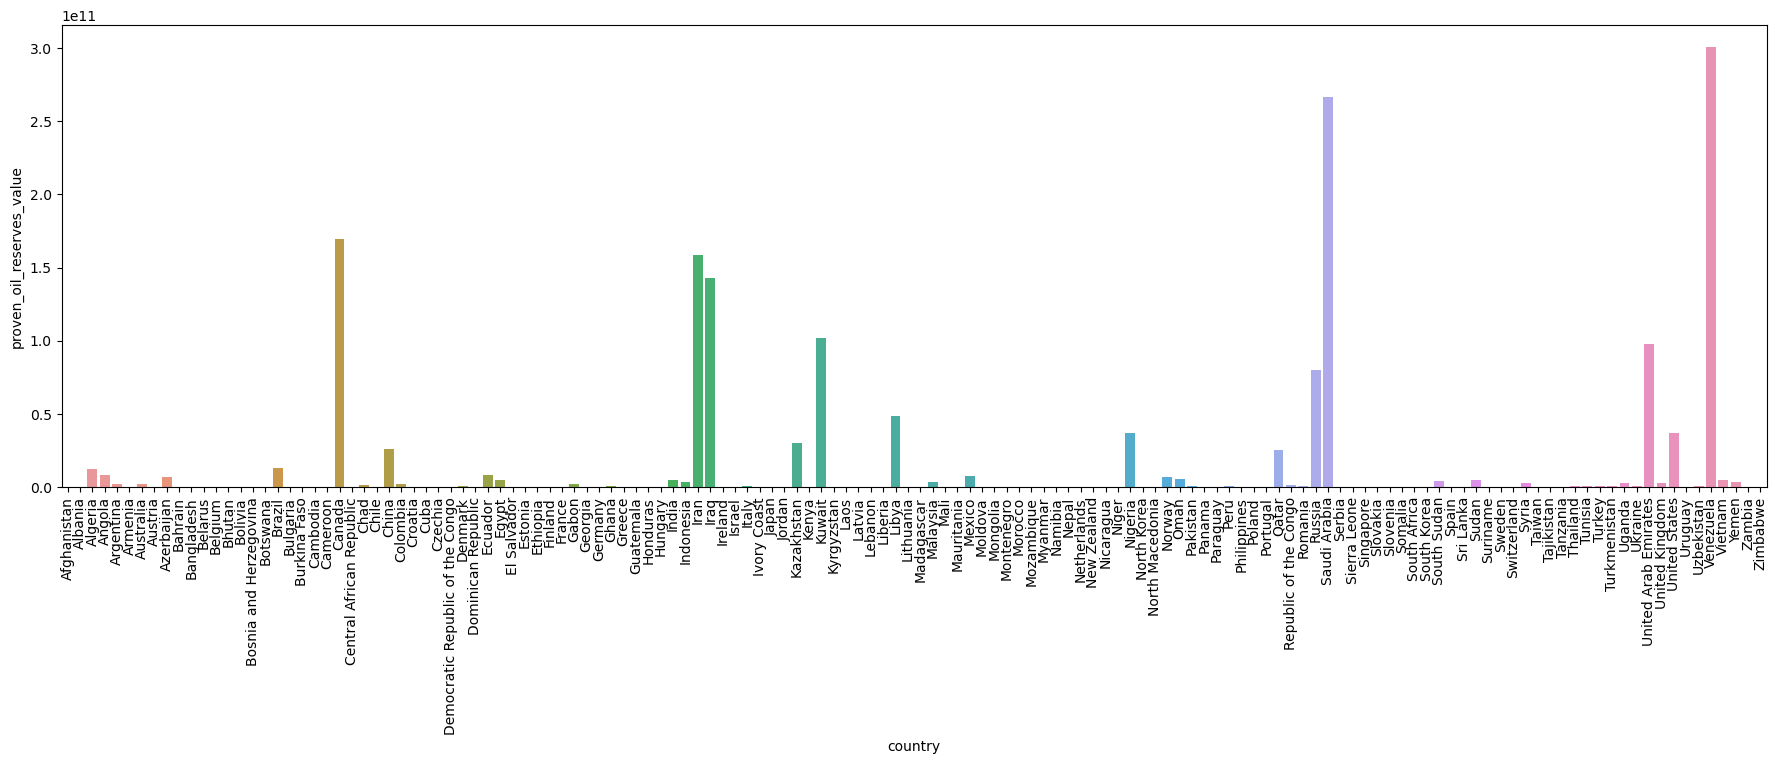

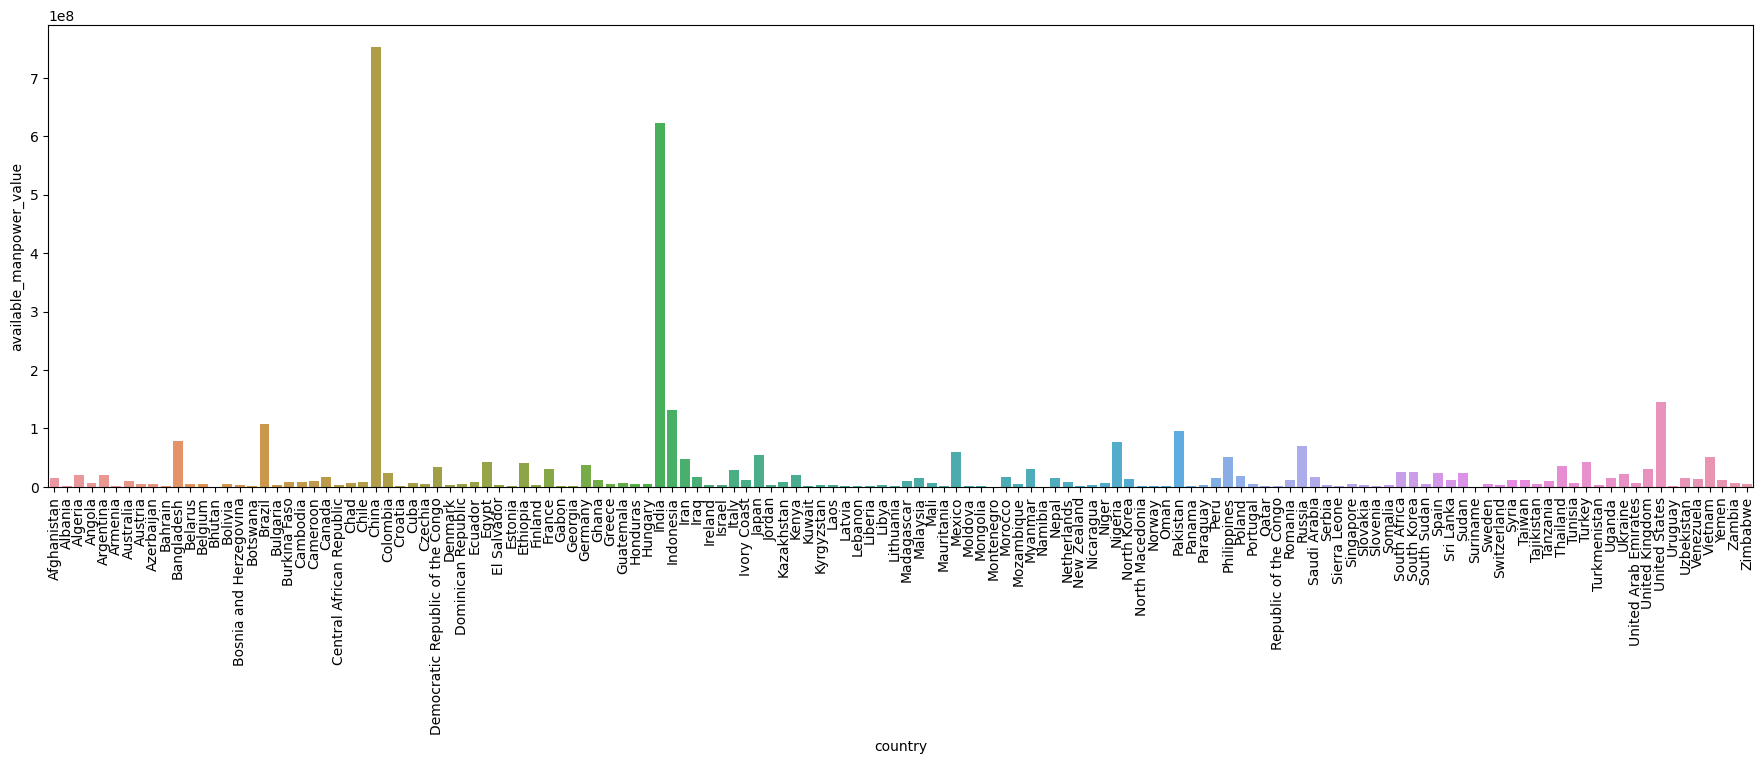

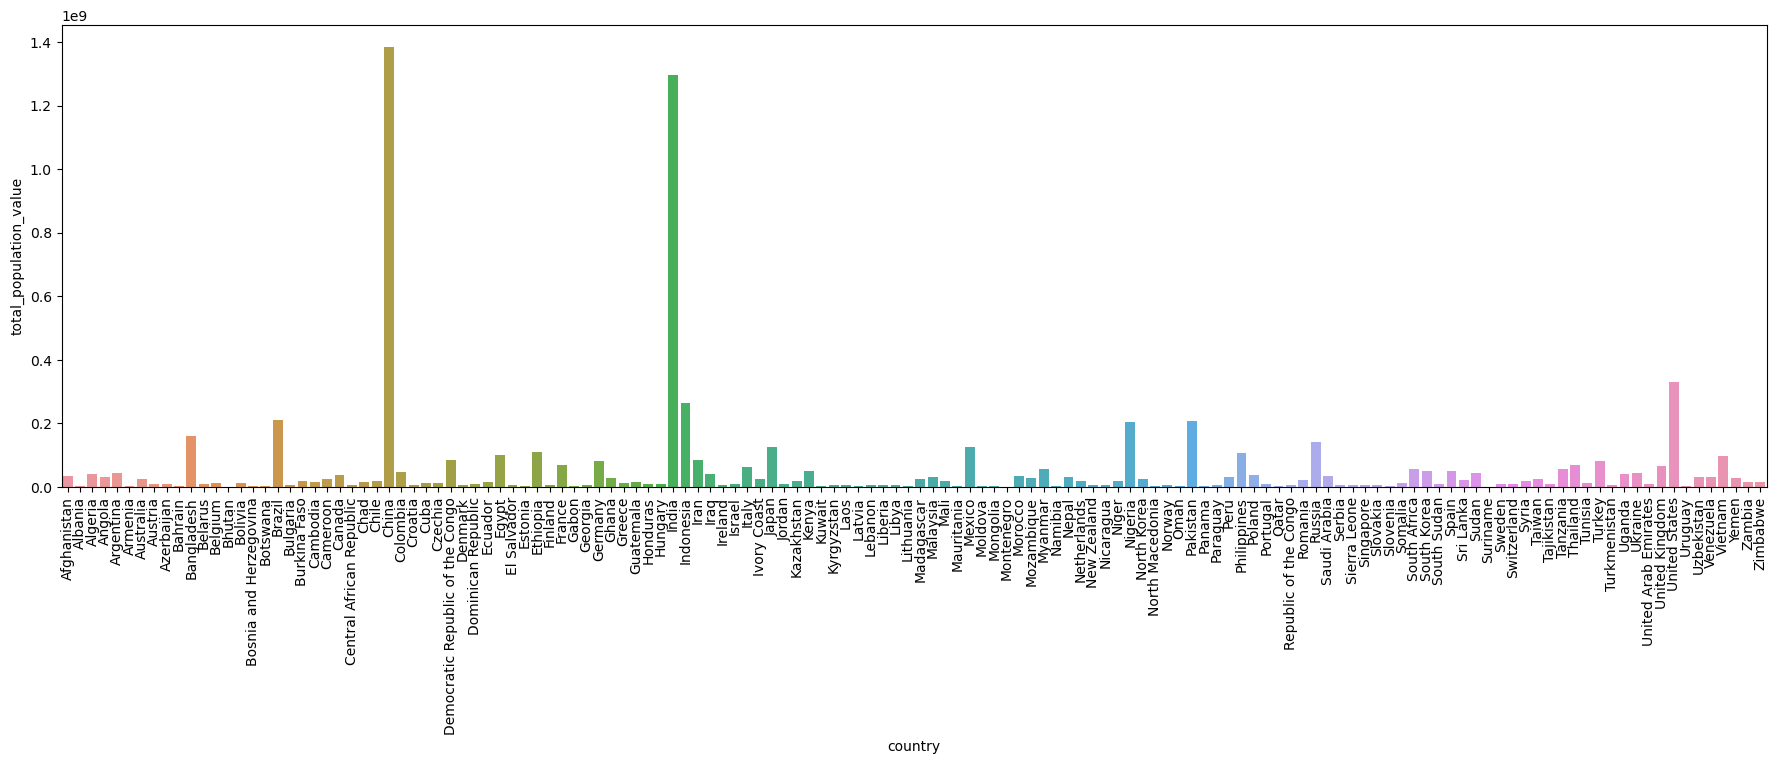

In [453]:
for col in df.columns:
    plt.figure(figsize = (22,6))
    sns.barplot(y = df[col], x = df.index, data = df)
    plt.xticks(rotation = 90)
    plt.show()

## Descriptive statistics

In [454]:
df.describe().T

count             mean  \
military_strength_power_index           138.000            1.461   
aircraft_strength_value                 138.000          388.471   
fighter/interceptor_strength_value      138.000           81.565   
attack_aircraft_strength_value          138.000           25.761   
transport_aircraft_fleet_strength_value 138.000           30.232   
trainer_aircraft_fleet_value            138.000           82.833   
helicopter_fleet_strength_value         138.000          154.065   
attack_helicopter_fleet_strength_value  138.000           25.623   
tank_strength_value                     138.000          646.565   
afv/apc_strength_value                  138.000         2485.696   
self-propelled_artillery_strength_value 138.000          212.159   
towed_artillery_strength_value          138.000          393.978   
rocket_projector_strength_value         138.000          156.935   
navy_fleet_strengths_value              138.000           76.362   
aircraft_carrier_fleet_strength_value   138.000            0.319   
submarine_fleet_strength_value          138.000            4.159   
destroyer_fleet_strength_value          138.000            1.797   
frigate_fleet_strength_value            138.000            2.964   
defense_spending_budget_value           138.000  13993631641.210   
external_debt_value                     138.000 519498263043.478   
airport_totals_value                    138.000          290.043   
oil_production_value                    138.000       585552.355   
oil_consumption_value                   138.000       702018.696   
proven_oil_reserves_value               138.000  11944118420.290   
available_manpower_value                138.000     25442969.935   
total_population_value                  138.000     53180584.652   

                                                      std           min  \
military_strength_power_index                       1.324         0.061   
aircraft_strength_value                          1231.982         0.000   
fighter/interceptor_strength_value                230.325         0.000   
attack_aircraft_strength_value                     94.528         0.000   
transport_aircraft_fleet_strength_value            92.330         0.000   
trainer_aircraft_fleet_value                      240.804         0.000   
helicopter_fleet_strength_value                   520.184         0.000   
attack_helicopter_fleet_strength_value             97.326         0.000   
tank_strength_value                              1515.464         0.000   
afv/apc_strength_value                           5410.546         0.000   
self-propelled_artillery_strength_value           688.029         0.000   
towed_artillery_strength_value                    805.782         0.000   
rocket_projector_strength_value                   484.381         0.000   
navy_fleet_strengths_value                        140.822         0.000   
aircraft_carrier_fleet_strength_value               1.804         0.000   
submarine_fleet_strength_value                     12.719         0.000   
destroyer_fleet_strength_value                      9.195         0.000   
frigate_fleet_strength_value                        6.053         0.000   
defense_spending_budget_value             67311892724.125  13000000.000   
external_debt_value                     1847251527661.875 539400000.000   
airport_totals_value                             1212.967         2.000   
oil_production_value                          1667138.897         0.000   
oil_consumption_value                         2168810.056      2000.000   
proven_oil_reserves_value                 42750903273.129         0.000   
available_manpower_value                     84506975.276    132740.000   
total_population_value                      165108987.399    597927.000   

                                                   25%             50%  \
military_strength_power_index                    0.575           1.034   
aircraft_strength_value        

# Data Preprocessing

In [455]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [456]:
df1 = df.copy()

In [457]:
df1.reset_index(inplace=True)

In [458]:
df1.head(1)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                  260.000   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                               0.000                          25.000   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                   30.000                         0.000   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                          187.000                                   0.000   

   tank_strength_value  afv/apc_strength_value  \
0                0.000                1062.000   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                    0.000                         176.000   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                           50.000                       0.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                43.000   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0                 0.000               5500.000                      0.000   

   available_manpower_value  total_population_value  
0              14325743.000            34940837.000

In [459]:
X = df1.drop(["country"], axis = 1)

In [460]:
scaler = scale

In [461]:
X_scaled = pd.DataFrame(scaler(X))

In [462]:
X_scaled.head(1)

0      1      2      3      4      5     6      7      8      9      10  \
0 -0.088 -0.105 -0.355 -0.008 -0.003 -0.345 0.064 -0.264 -0.428 -0.264 -0.309   

      11     12     13     14     15     16     17     18     19     20  \
0 -0.272 -0.222 -0.544 -0.177 -0.328 -0.196 -0.491 -0.030 -0.281 -0.204   

      21     22     23     24     25  
0 -0.353 -0.322 -0.280 -0.132 -0.111

In [463]:
X_scaled.shape

(138, 26)

# Modelling

In [464]:
K_means_model = KMeans(random_state = 101)

In [465]:
K_means_model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 0, 3, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 6, 0, 0, 0, 6, 6, 0, 0, 7, 0, 7, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0,
       6, 0, 7, 0, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0])

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [466]:
# !pip install pyclustertend

In [467]:
# from pyclustertend import hopkins

In [468]:
# hopkins(df, df.shape[0])

In [469]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd


def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.

    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.

    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)

    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    # Sample n observations from D : P

    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')

    data_frame_sample = data_frame.sample(n=sampling_size)

    # Get the distance to their neirest neighbors in D : X

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]

    # Randomly simulate n points with the same variation as in D : Q.

    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()

    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)

    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)

    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)

    # Get the distance to their neirest neighbors in D : Y

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist

    # return the hopkins score

    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')

    return x / (x + y)[0]

In [470]:
hopkins(df, df.shape[0])

0.0670963954231907

In [471]:
df11 = df.copy()
df12 = df.copy()
df13 = df.copy()

In [472]:
hopkins(scale(df11), df11.shape[0])

0.0747074401515254

In [473]:
hopkins(MinMaxScaler().fit_transform(df12), df12.shape[0])

0.08405848772588607

In [474]:
hopkins(StandardScaler().fit_transform(df13), df13.shape[0])

0.07618641241795682

In [475]:
hopkins(scale(df), df.shape[0])

0.07554689144665062

## Clustering with K-means

### Elbow Method 
We use this method to find optimal k value by looking up to break point of graph. 

In [476]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

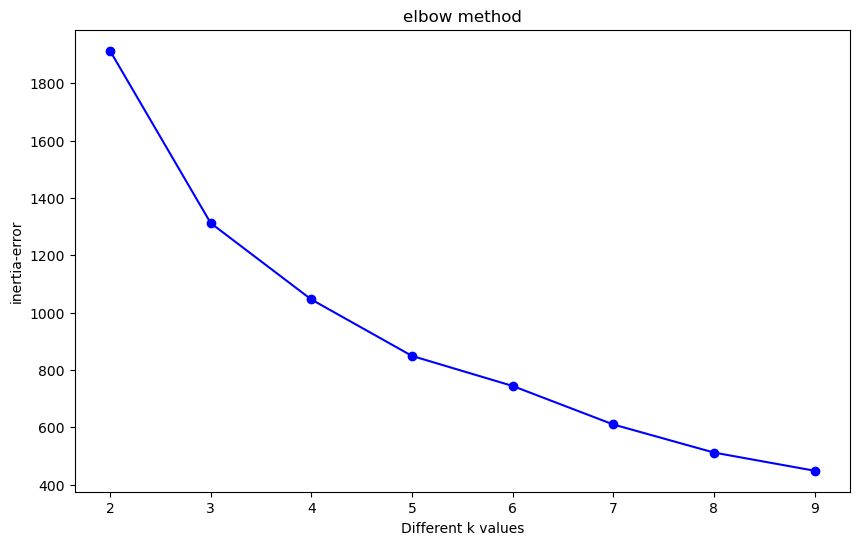

In [477]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

plt.show()

In [478]:
ssd # sum of squared distance

[1913.482572610682,
 1312.3964106007525,
 1045.8678492319907,
 849.0017491804559,
 744.2002246322534,
 609.848782984365,
 511.8713984426133,
 448.4956396877131]

In [479]:
pd.Series(ssd).diff()

0        NaN
1   -601.086
2   -266.529
3   -196.866
4   -104.802
5   -134.351
6    -97.977
7    -63.376
dtype: float64

In [480]:
df1_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df1_diff

0
1     NaN
2 601.086
3 266.529
4 196.866
5 104.802
6 134.351
7  97.977
8  63.376

<AxesSubplot:>

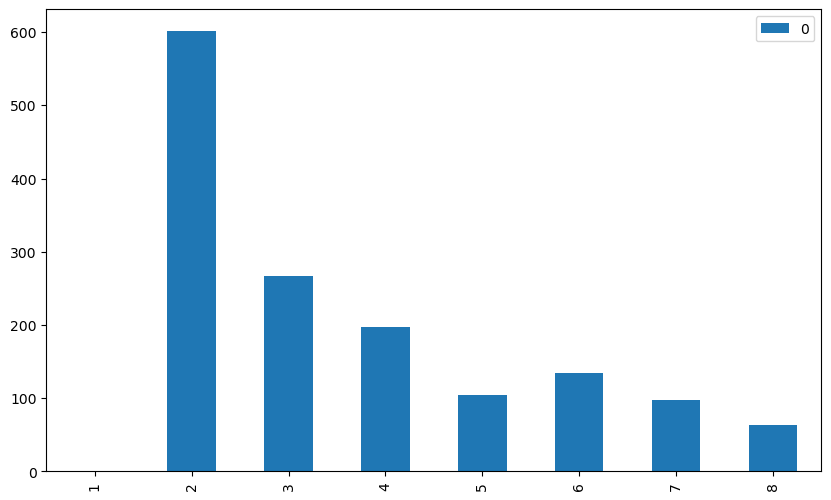

In [481]:
df1_diff.plot(kind='bar')

In [482]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

ImportError: cannot import name '_is_pairwise' from 'sklearn.base' (C:\Users\Toshiba\anaconda3\lib\site-packages\sklearn\base.py)

### Silhouette analysis

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X_scaled, K_means_model.labels_)

In [ ]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

### Model Building and label visualisation

In [ ]:
model = KMeans(n_clusters = 4, random_state = 101)
model.fit_predict(X_scaled)

In [ ]:
model.labels_

In [ ]:
X["clusters"] = model.fit_predict(X_scaled)

In [ ]:
X.head()

In [ ]:
X.clusters.value_counts()

In [ ]:
df1.head(1)

In [ ]:
df1["predicted_clusters"] = model.fit_predict(X_scaled)

In [ ]:
df1["predicted_clusters"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

In [ ]:
df1.predicted_clusters.value_counts()

sns.countplot(x=df1["predicted_clusters"], data=df1)
for index,value in enumerate(df1.predicted_clusters.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [ ]:
df1[df1["predicted_clusters"]==0][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

In [ ]:
df1[df1["predicted_clusters"]==1][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

In [ ]:
df1[df1["predicted_clusters"]==2][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

In [ ]:
df1[df1["predicted_clusters"]==3][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

### Evaluate 

In [ ]:
df1['military_strength_power_index'].describe()

In [ ]:
df1['military_strength_power_index'].value_counts().index.sort_values()

In [ ]:
df1['military_strength_power_index'].iplot(kind='hist', bins=200)

In [ ]:
def classification(military_strength_power_index):
    if military_strength_power_index <= 0.065:
        return 1
    elif 0.065 < military_strength_power_index <= 0.1:
        return 2
    elif 0.1 < military_strength_power_index <= 0.5:
        return 3
    else:
        return 0

In [ ]:
df1['classification'] = df1['military_strength_power_index'].apply(classification)

In [ ]:
df1.head(1)

In [ ]:
df1['classification'].value_counts()

In [ ]:
df1["classification"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

In [ ]:
df1.classification.value_counts()

sns.countplot(x=df1["classification"], data=df1)
for index,value in enumerate(df1.classification.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [ ]:
df1[df1["classification"]==2][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

In [ ]:
len(df1[df1["classification"]==2]["country"])

In [ ]:
df1[df1["classification"]==1][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

In [ ]:
len(df1[df1["classification"]==1]["country"])

In [ ]:
df1[df1["classification"]==0][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

In [ ]:
len(df1[df1["classification"]==0]["country"])

In [ ]:
df1[df1["classification"]==3][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

In [ ]:
len(df1[df1["classification"]==3]["country"])

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
df1_end = df1
df1_end

In [ ]:
df1.predicted_clusters.value_counts()

In [ ]:
df1.classification.value_counts()

In [ ]:
df1[["classification", "predicted_clusters"]].value_counts()

In [ ]:
df1[["country", "classification", "predicted_clusters"]]

In [ ]:
df1[df1["classification"]!=df1["predicted_clusters"]][["country", "classification", "predicted_clusters"]]

## Hierarchical Clustering

In [ ]:
df2 = df.copy()

In [ ]:
df2.head(1)

In [ ]:
X_scaled = scale(df2)

In [ ]:
pd.DataFrame(X_scaled)

### Hopkins Test

In [ ]:
hopkins(df2, df2.shape[0])

In [ ]:
df21 = df.copy()
df22 = df.copy()
df23 = df.copy()

In [ ]:
hopkins(scale(df21), df21.shape[0])

In [ ]:
hopkins(MinMaxScaler().fit_transform(df22), df22.shape[0])

In [ ]:
hopkins(StandardScaler().fit_transform(df23), df23.shape[0])

In [ ]:
hopkins(scale(df2), df.shape[0])

### Dendogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
hc_ward = linkage(y = df2, method = "ward")
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")

In [ ]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

In [ ]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [ ]:
sns.clustermap(df2);

In [ ]:
sns.clustermap(df2, col_cluster=False);

In [ ]:
sns.clustermap(df2, row_cluster=False);

### Model Building and label visualisation

In [ ]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
K = range(2,10)

for k in K:
    model_labels = AgglomerativeClustering(n_clusters = k,  
                                    affinity='euclidean', 
                                    linkage='ward').fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, model_labels)}')

In [ ]:
model = AgglomerativeClustering(n_clusters = 5,
                                affinity='euclidean',
                                linkage='ward')

In [ ]:
clusters = model.fit_predict(X_scaled)

In [ ]:
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c = clusters, cmap = "viridis")

In [ ]:
plt.figure(figsize = (20,60))

plt.subplot(9,3,1)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c = clusters, cmap = "viridis");
plt.subplot(9,3,2)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,2], c = clusters, cmap = "viridis");
plt.subplot(9,3,3)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,3], c = clusters, cmap = "viridis");
plt.subplot(9,3,4)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,4], c = clusters, cmap = "viridis");
plt.subplot(9,3,5)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,5], c = clusters, cmap = "viridis");
plt.subplot(9,3,6)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,6], c = clusters, cmap = "viridis");
plt.subplot(9,3,7)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,7], c = clusters, cmap = "viridis");
plt.subplot(9,3,8)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,8], c = clusters, cmap = "viridis");
plt.subplot(9,3,9)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,9], c = clusters, cmap = "viridis");
plt.subplot(9,3,10)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,10], c = clusters, cmap = "viridis");
plt.subplot(9,3,11)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,11], c = clusters, cmap = "viridis");
plt.subplot(9,3,12)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,12], c = clusters, cmap = "viridis");

In [ ]:
df2["predicted_clusters_hc"] = clusters

In [ ]:
df2.head()

In [ ]:
df2.groupby("predicted_clusters_hc").mean()

In [ ]:
df2.predicted_clusters_hc.value_counts()

In [ ]:
df2[df2["predicted_clusters_hc"]==0].index

In [ ]:
df2[df2["predicted_clusters_hc"]==1].index

In [ ]:
df2[df2["predicted_clusters_hc"]==2].index

In [ ]:
df2[df2["predicted_clusters_hc"]==3].index

In [ ]:
df2[df2["predicted_clusters_hc"]==4].index

### Evaluate 

In [ ]:
df2["military_power"] = df2["predicted_clusters_hc"].map({  0 : "low",
                                                            1 : "medium",
                                                            2 : "most_powerfull",
                                                            3 : "powerfull",
                                                            4 : "weak",
                                                         })

In [ ]:
df2.head(1)

In [ ]:
df2.reset_index(inplace=True)

In [ ]:
df2["predicted_clusters_hc"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

In [ ]:
df2.predicted_clusters_hc.value_counts()

In [ ]:
df2.predicted_clusters_hc.value_counts()

sns.countplot(x=df2["predicted_clusters_hc"], data=df2)
for index,value in enumerate(df2.predicted_clusters_hc.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [ ]:
df2.groupby("predicted_clusters_hc")["country"].unique()

In [ ]:
df2["military_power"].value_counts()

In [ ]:
df2.groupby("military_power")["country"].unique()["weak"]

In [ ]:
df2.groupby("military_power")["country"].unique()["low"]

In [ ]:
df2.groupby("military_power")["country"].unique()["medium"]

In [ ]:
df2.groupby("military_power")["country"].unique()["powerfull"]

In [ ]:
df2.groupby("military_power")["country"].unique()["most_powerfull"]

In [ ]:
df1['military_strength_power_index'].iplot(kind='hist', bins=200)

In [ ]:
def classification1(military_strength_power_index):
    if military_strength_power_index <= 0.065:
        return "most_powerfull"
    elif 0.065 < military_strength_power_index <= 0.070:
        return "powerfull"
    elif 0.070 < military_strength_power_index <= 0.1:
        return "medium"
    elif 0.1 < military_strength_power_index <= 0.85:
        return "low"
    else:
        return "weak"

In [ ]:
df.military_strength_power_index.sort_values()

In [ ]:
df2['classification'] = df2['military_strength_power_index'].apply(classification1)

In [ ]:
df2['classification'].value_counts()

In [ ]:
df2['military_power'].value_counts()

In [ ]:
df2["classification"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

In [ ]:
df2.classification.value_counts()

In [ ]:
df2.classification.value_counts()

sns.countplot(x=df2["classification"], data=df2)
for index,value in enumerate(df2.classification.value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [ ]:
df2[["classification", "military_power"]].value_counts()

In [ ]:
df2[["country", "classification", "military_power"]]

In [ ]:
df2[df2["classification"]!=df2["military_power"]][["country", "classification", "military_power"]]